# Car Prices Prediction 
## overview
I'm the one who try and preactice myshelf aim to be a Data scientist
Machine learning is need to know and get famillier with, so this CAR PRICE PREDICETION is a one of useful case to study and echance with EDA and Machine learning. Let's get start  

## Data set
first step of any analysis is data understanding.
Car Prices Prediction is simply to understand. The goal is predict CAR PRICE (Target-Y) by other datailes (variable-X) 


## EDA 
explor data to know data behavier,so I did
- basic statistic checking
- Missingno
- outlier cheking
- normality checking
- correlation plot
- transform data
- categorical -one hot end coding
- VIF
- polynomial
- endcoding data  

## Modeling
to learn various Machine learning work, so I did 7 Regressor 
- Linear Regression 
- Support Vector Regressor  
- K - Neighbors Regressor 
- PLS Regression
- Decision Tree Regressor 
- Gradient Boosting Regressor 
- MLP Regressor 


## Measure
- Mean Squared Error (MSE)
- Mean Absolute Error (MAE)
- R^2

--------------------------------------------------------------------------------
# let's get start!!

In [ ]:
#import lib

In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler 
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle 
from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
#Loading data and simple check the data

In [ ]:
path = '/content/drive/MyDrive/Car/data.csv'

In [ ]:
data = pd.read_csv(path)

In [ ]:
data.shape

(11914, 16)

In [ ]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [ ]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

#EDA

###FIRST TABLE CHECK

In [ ]:
#create new feature 'YearAge'

def AgeYears(feature): 
    return feature.apply(lambda x: 0 if x==0 else (2022 - x))

data['YearAge'] = AgeYears(data.Year) 

In [ ]:
obs = data.shape[0]
types = data.dtypes
counts = data.apply(lambda x: x.count())
uniques = data.apply(lambda x: [x.unique()]).transpose()
nulls = data.apply(lambda x: x.isnull().sum())
distincts = data.apply(lambda x: x.unique().shape[0])
missing_ration = (data.isnull().sum()/ obs) * 100
skewness = data.skew()
kurtosis = data.kurt() 

In [ ]:
corr = data.corr()['MSRP']
corr_col = 'corr '  + 'MSRP'
str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
str.columns = cols
str.sort_values(by ='corr MSRP', ascending=False)

,types,counts,distincts,nulls,missing_ration,uniques,skewness,kurtosis,corr MSRP
MSRP,int64,11914,6049,0,0.000000,"[46135, 40650, 36350, 29450, 34500, 31200, 441...",11.771987,268.926276,1.000000
Engine HP,float64,11845,357,69,0.579151,"[335.0, 300.0, 230.0, 320.0, 172.0, 160.0, 130...",1.291230,2.323884,0.662008
Engine Cylinders,float64,11884,10,30,0.251805,"[6.0, 4.0, 5.0, 8.0, 12.0, 0.0, nan, 10.0, 3.0...",0.964542,1.974316,0.531312
Year,int64,11914,28,0,0.000000,"[2011, 2012, 2013, 1992, 1993, 1994, 2017, 199...",-1.221981,0.299838,0.227590
Popularity,int64,11914,48,0,0.000000,"[3916, 3105, 819, 617, 1013, 2009, 870, 586, 4...",1.653443,2.277090,-0.048476
Number of Doors,float64,11908,4,6,0.050361,"[2.0, 4.0, 3.0, nan]",-0.968671,-1.009111,-0.126635
city mpg,int64,11914,69,0,0.000000,"[19, 20, 18, 17, 16, 26, 23, 22, 21, 24, 15, 2...",7.106681,74.623487,-0.157676
highway MPG,int64,11914,59,0,0.000000,"[26, 28, 27, 25, 24, 20, 21, 22, 35, 34, 31, 3...",7.573931,181.627364,-0.160043
YearAge,int64,11914,28,0,0.000000,"[11, 10, 9, 30, 29, 28, 5, 31, 6, 32, 7, 26, 2...",1.221981,0.299838,-0.227590
Make,object,11914,48,0,0.000000,"[BMW, Audi, FIAT, Mercedes-Benz, Chrysler, Nis...",NaN,NaN,NaN


In [ ]:
#missing check

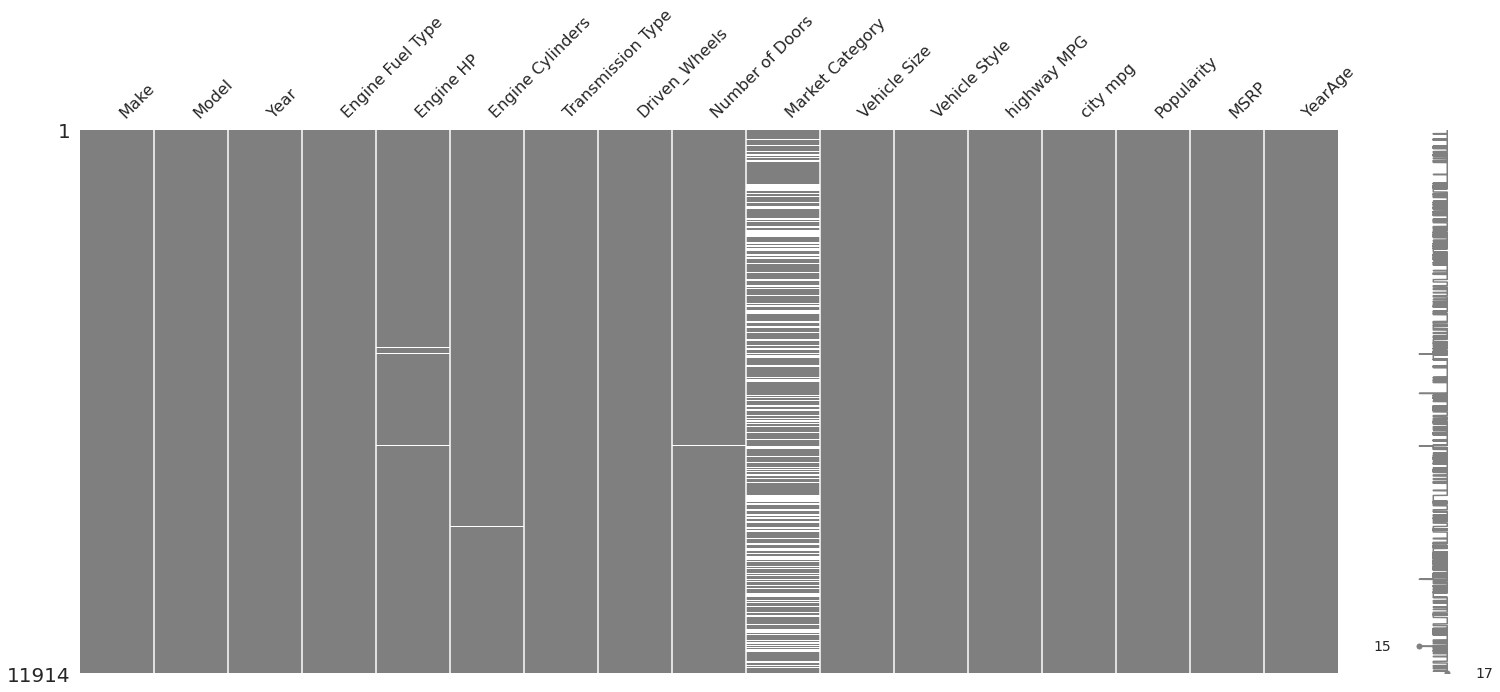

In [ ]:
msno.matrix(data, color = (0.5, 0.5, 0.5))

In [ ]:
data = data.drop(['Market Category'], axis = 1)

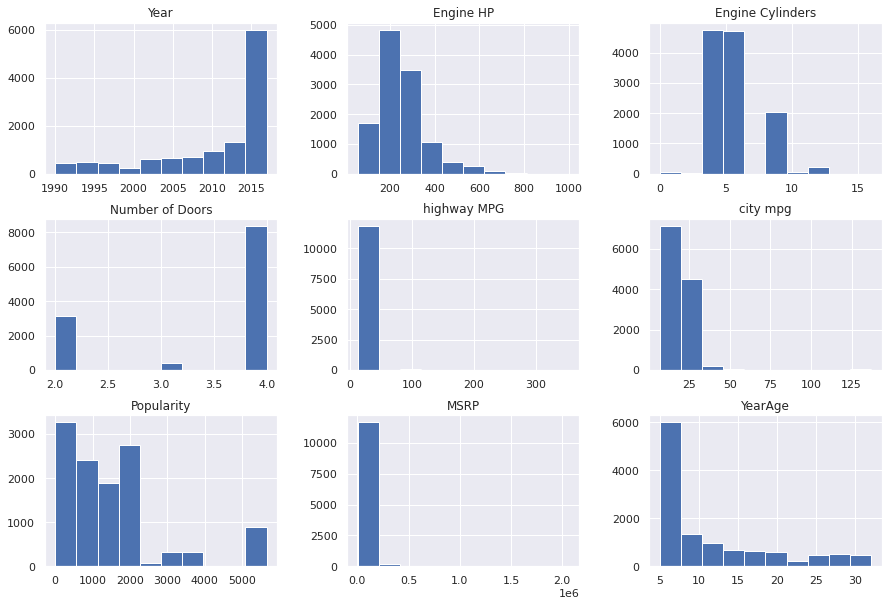

In [ ]:
data.hist(figsize = (15,10));

First Table summary
- corr view: 
  - **High in positive**: 'Engine HP' and 'Engine Cylinders' contain > 0.5 positive 
corr with MSRP 
  - **Corr in nagative**: In negative corr 'city mpg', 'Highway mpg' and 'YearAge' perform around 0.15-0.25 corr with 'MSRP'
  - **Not corr**: 'Popularity' and number of door quite not corr with 'MSRP' much
- **high kurtosis** represent outlier : perform in 'MSRP' and 'Highway mpg'
- **high skewness** represent normality issue a litter perfoem with 'MSRP'


- Drop one feature contain 31.4% missing: 'Market Category'
- 7 categorical feature later check

###Target-Y check

In [ ]:
  import plotly.express as px
  import plotly.graph_objects as go 

In [ ]:
def boxplot(data , X , Y ,title):
  fig = px.box(data , x = X , y = Y)

  fig.update_layout(title = title,
                 xaxis_title = X ,
                 yaxis_title = Y)

  fig.show()

In [ ]:
boxplot(data, 'Year' , 'MSRP', "MSRP boxplot")

In [ ]:
# Construct data
index = data.groupby(['Year']).mean()['MSRP'].index.tolist()
mean_prices = data.groupby(['Year']).mean()['MSRP'].values.tolist()
std_prices = data.groupby(['Year']).std()['MSRP'].values.tolist()

# Data that will be used
price_per_year = pd.DataFrame(np.column_stack((mean_prices, std_prices)), columns=['Mean', 'Std'], index=index)

# Plot
fig = go.Figure()

fig.add_trace(go.Scatter(x=index, y=price_per_year.Mean,
                    mode='markers',
                    name='Mean Price'))

fig.add_trace(go.Scatter(x=index, y=price_per_year.Std,
                    mode='markers',
                    name='Std Price'))

fig.update_layout(title="Average MSRP per Year",
                  xaxis_title="Year",
                  yaxis_title="MSRP")

fig.show()

In [ ]:
max_price = np.argmax(data.loc[data['Year']==2008, 'MSRP'])

In [ ]:
data_2008 = data[data['Year'] == 2008]
data_2008.iloc[max_price ,:]

Make                                     Bugatti
Model                                Veyron 16.4
Year                                        2008
Engine Fuel Type     premium unleaded (required)
Engine HP                                 1001.0
Engine Cylinders                            16.0
Transmission Type               AUTOMATED_MANUAL
Driven_Wheels                    all wheel drive
Number of Doors                              2.0
Vehicle Size                             Compact
Vehicle Style                              Coupe
highway MPG                                   14
city mpg                                       8
Popularity                                   820
MSRP                                     2065902
YearAge                                       14
Name: 11362, dtype: object

TARGET outlier check summary
,it exactly clear that data are saparate to two range of price 
  - data_Y2000up
  - data_Y2000down

In [ ]:
data_Y2000up = data[data['Year']>2000]
data_Y2000down = data[data['Year']<=2000]

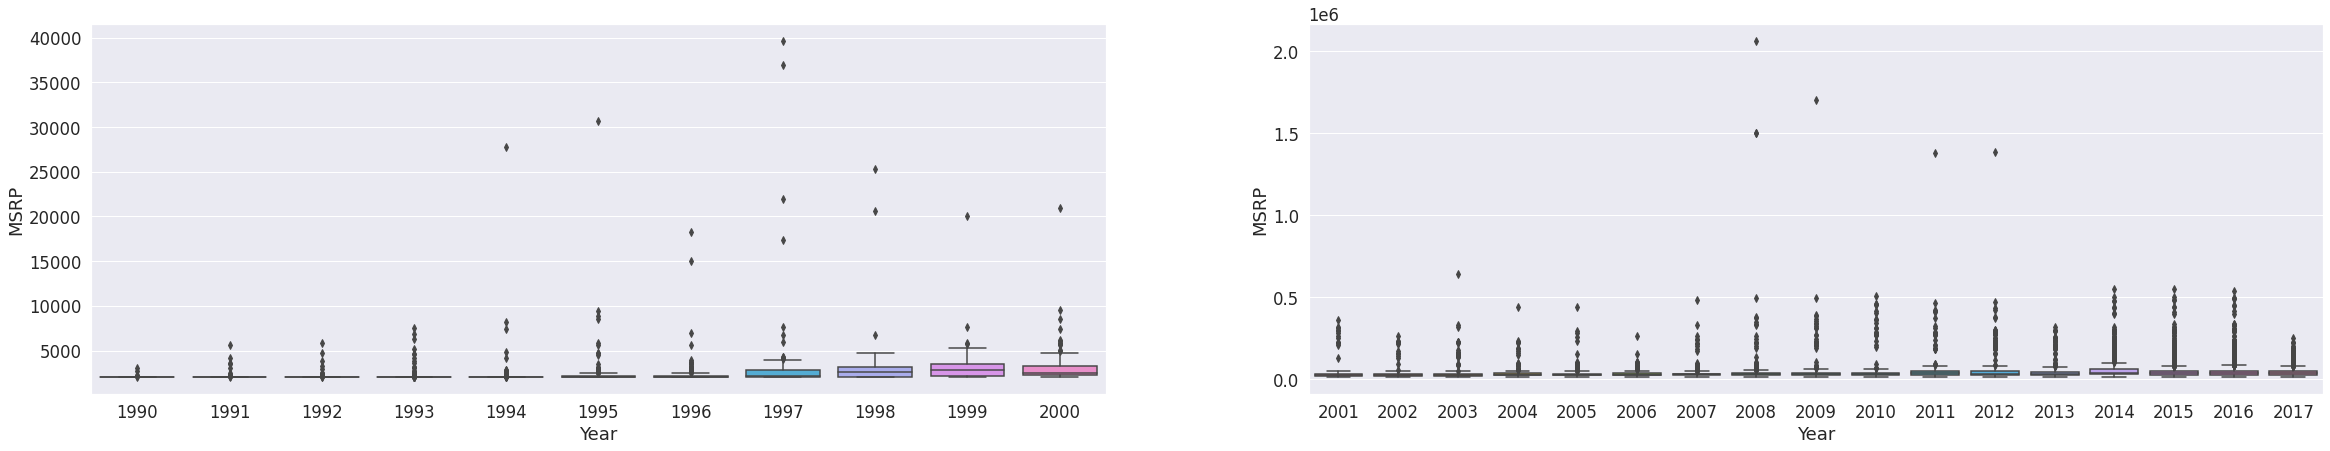

In [ ]:
fig = plt.figure(figsize=(40, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); 
sns.boxplot(x='Year', y='MSRP', data=data_Y2000down)

fig2 = fig.add_subplot(222)
sns.boxplot(x='Year', y='MSRP', data=data_Y2000up)

In [ ]:
#saparate, then remove outlier saparately 

In [ ]:
data_Y2000down_filter = data_Y2000down[data_Y2000down['MSRP']< 10000]
data_Y2000up_filter = data_Y2000up[data_Y2000up['MSRP']< 500000]

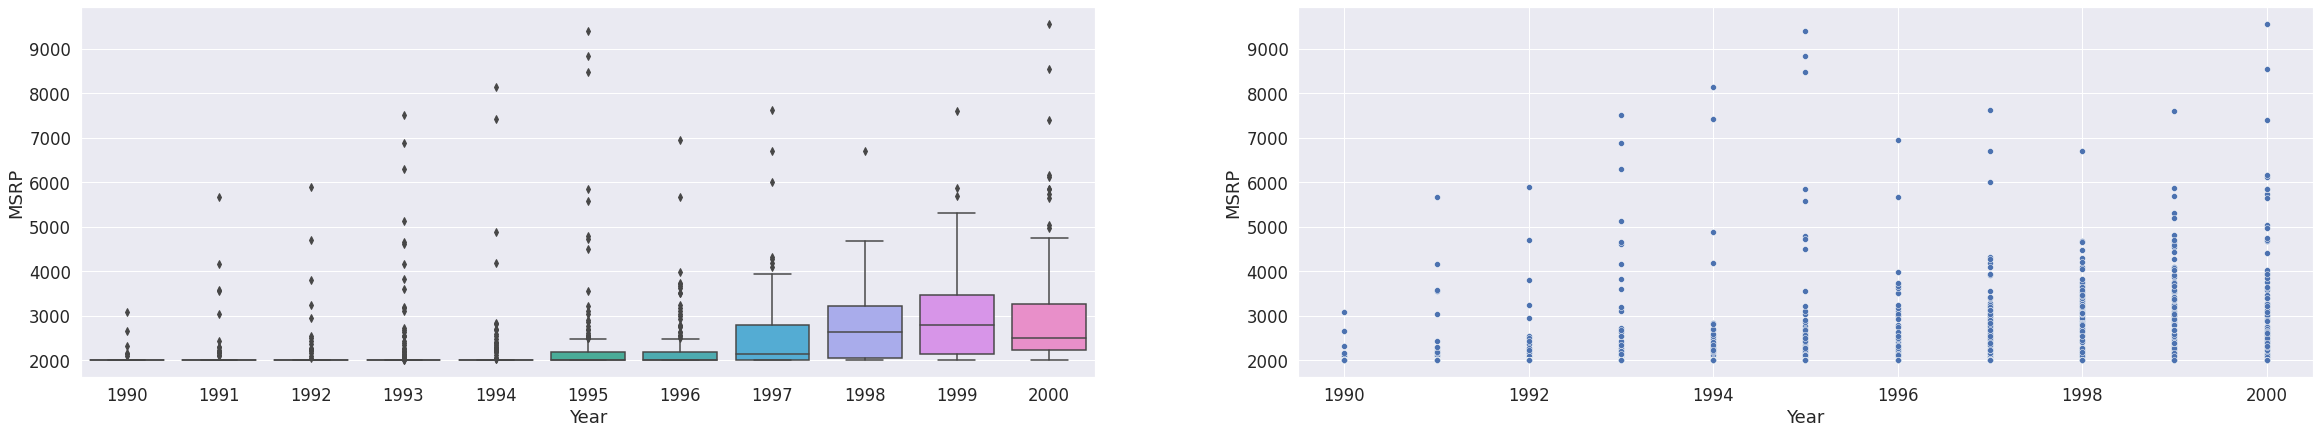

In [ ]:
fig = plt.figure(figsize=(40, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); 
sns.boxplot(x='Year', y='MSRP', data=data_Y2000down_filter)

fig2 = fig.add_subplot(222)
sns.scatterplot(x='Year', y='MSRP', data=data_Y2000down_filter)

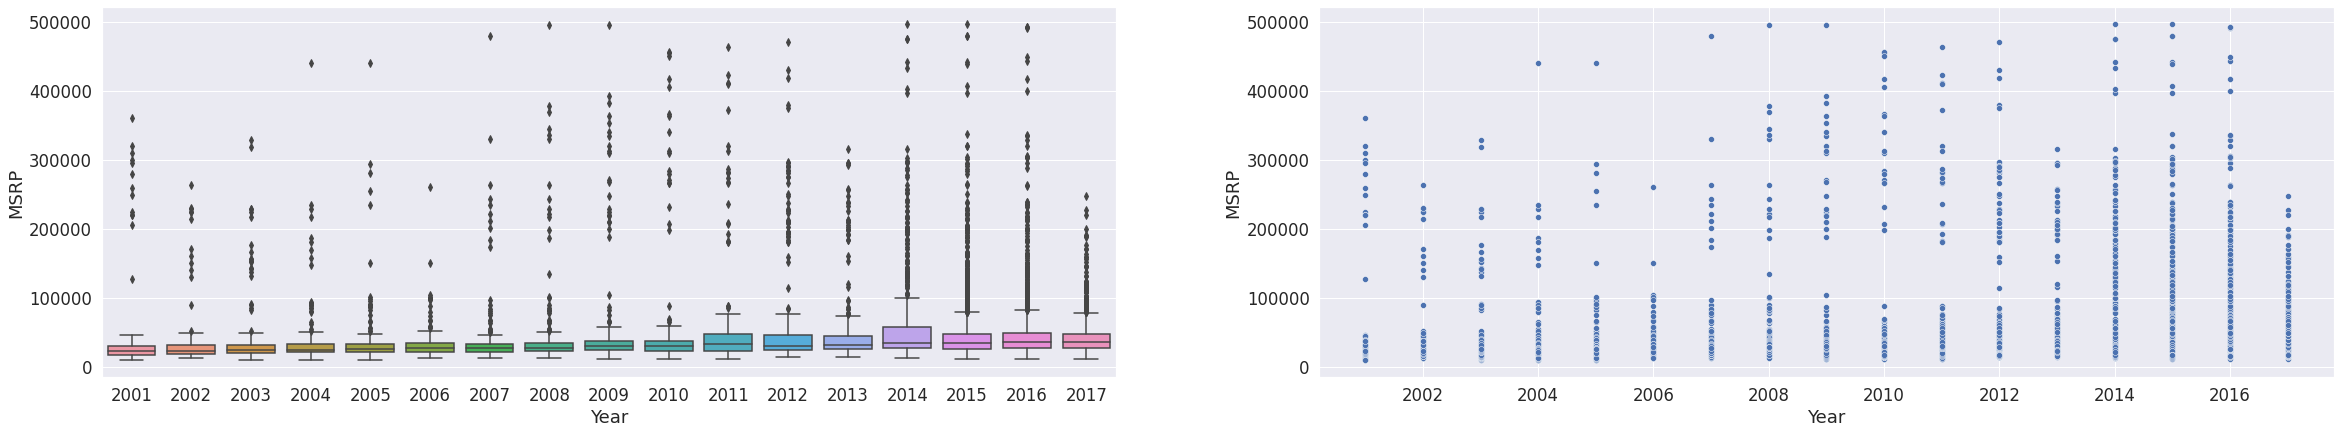

In [ ]:
fig = plt.figure(figsize=(40, 15))
sns.set(font_scale=1.5)

fig1 = fig.add_subplot(221); 
sns.boxplot(x='Year', y='MSRP', data=data_Y2000up_filter)

fig2 = fig.add_subplot(222)
sns.scatterplot(x='Year', y='MSRP', data=data_Y2000up_filter)

In [ ]:
#Data2 => concat 2 subgroup after remove outlier together

In [ ]:
data2 = data.copy()
data2 = pd.concat([data_Y2000down_filter,data_Y2000up_filter])

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11891 entries, 17 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11891 non-null  object 
 1   Model              11891 non-null  object 
 2   Year               11891 non-null  int64  
 3   Engine Fuel Type   11888 non-null  object 
 4   Engine HP          11822 non-null  float64
 5   Engine Cylinders   11861 non-null  float64
 6   Transmission Type  11891 non-null  object 
 7   Driven_Wheels      11891 non-null  object 
 8   Number of Doors    11885 non-null  float64
 9   Vehicle Size       11891 non-null  object 
 10  Vehicle Style      11891 non-null  object 
 11  highway MPG        11891 non-null  int64  
 12  city mpg           11891 non-null  int64  
 13  Popularity         11891 non-null  int64  
 14  MSRP               11891 non-null  int64  
 15  YearAge            11891 non-null  int64  
dtypes: float64(3), int64(

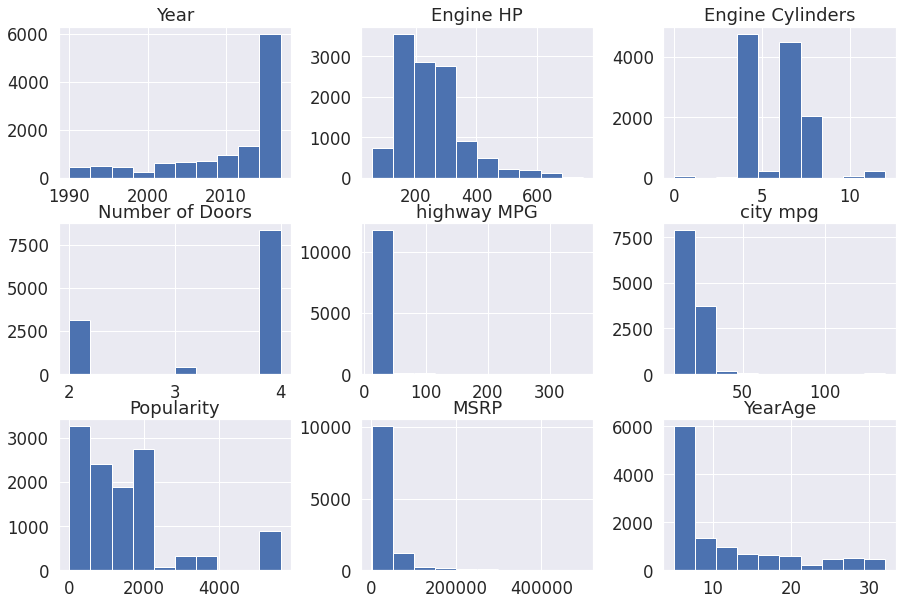

In [ ]:
data2.hist(figsize = (15,10));

In [ ]:
obs = data2.shape[0]
types = data2.dtypes
counts = data2.apply(lambda x: x.count())
uniques = data2.apply(lambda x: [x.unique()]).transpose()
nulls = data2.apply(lambda x: x.isnull().sum())
distincts = data2.apply(lambda x: x.unique().shape[0])
missing_ration = (data2.isnull().sum()/ obs) * 100
skewness = data2.skew()
kurtosis = data2.kurt() 

In [ ]:
corr = data2.corr()['MSRP']
corr_col = 'corr '  + 'MSRP'
str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
str.columns = cols
str.sort_values(by ='corr MSRP', ascending=False)

,types,counts,distincts,nulls,missing_ration,uniques,skewness,kurtosis,corr MSRP
MSRP,int64,11891,6029,0,0.000000,"[2000, 2073, 3713, 3520, 3910, 4182, 4107, 429...",4.570978,27.596455,1.000000
Engine HP,float64,11822,355,69,0.580271,"[172.0, 130.0, 158.0, 162.0, 217.0, 115.0, 140...",1.220370,1.817343,0.738011
Engine Cylinders,float64,11861,9,30,0.252292,"[6.0, 4.0, 5.0, 8.0, 12.0, 3.0, nan, 0.0, 10.0]",0.919811,1.746961,0.581147
Year,int64,11891,28,0,0.000000,"[1992, 1993, 1994, 1991, 1990, 1996, 1997, 199...",-1.226579,0.313907,0.289567
Popularity,int64,11891,47,0,0.000000,"[3105, 617, 2009, 870, 436, 586, 210, 3916, 37...",1.652462,2.270644,-0.050377
Number of Doors,float64,11885,4,6,0.050458,"[4.0, 2.0, 3.0, nan]",-0.974915,-0.996602,-0.139362
city mpg,int64,11891,68,0,0.000000,"[17, 16, 18, 15, 26, 21, 25, 20, 19, 14, 23, 2...",7.114587,74.685342,-0.174278
highway MPG,int64,11891,59,0,0.000000,"[24, 20, 21, 22, 26, 25, 23, 36, 29, 35, 28, 1...",7.591392,182.106250,-0.174575
YearAge,int64,11891,28,0,0.000000,"[30, 29, 28, 31, 32, 26, 25, 24, 23, 27, 22, 1...",1.226579,0.313907,-0.289567
Make,object,11891,47,0,0.000000,"[Audi, Mercedes-Benz, Nissan, Volvo, Mitsubish...",NaN,NaN,NaN


Remove outlier summary: skewness, kurtosis of MSRP perforrm better after remove outlier 

In [ ]:
#Target nomality check withh QQ-plot

In [ ]:
from scipy.stats import skew, norm, probplot, boxcox

In [ ]:
def QQ_plot(data, measure):
    fig = plt.figure(figsize=(20,7))

    #Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(data)

    #Kernel Density plot
    fig1 = fig.add_subplot(121)
    sns.distplot(data, fit=norm)
    fig1.set_title(measure + ' Distribution ( mu = {:.2f} and sigma = {:.2f} )'.format(mu, sigma), loc='center')
    fig1.set_xlabel(measure)
    fig1.set_ylabel('Frequency')

    #QQ plot
    fig2 = fig.add_subplot(122)
    res = probplot(data, plot=fig2)
    fig2.set_title(measure + ' Probability Plot (skewness: {:.6f} and kurtosis: {:.6f} )'.format(data.skew(), data.kurt()), loc='center')

    plt.tight_layout()
    plt.show()

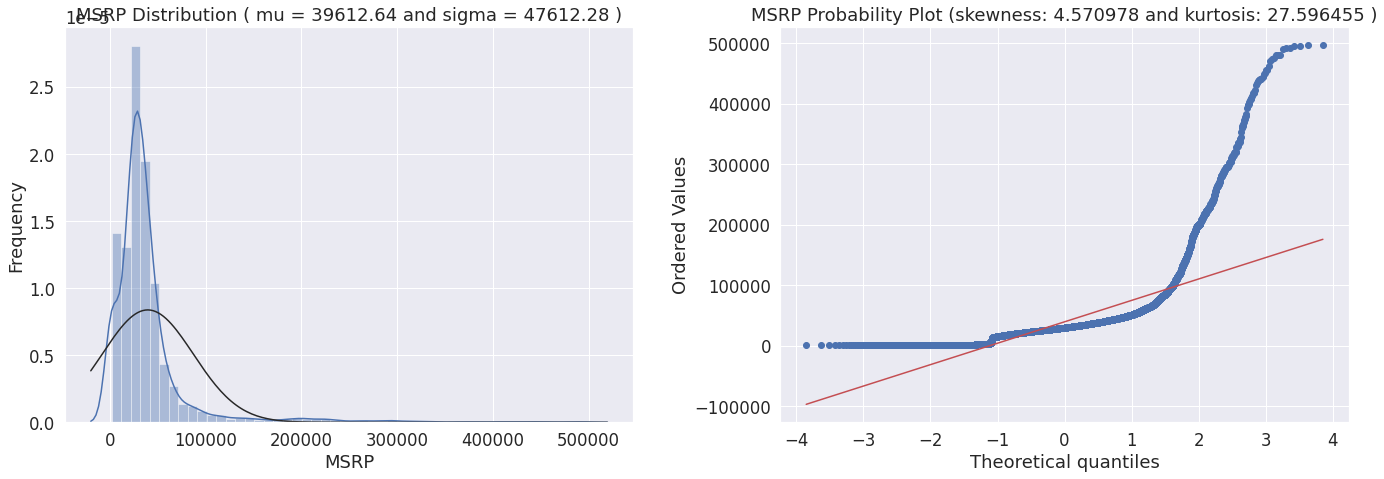

In [ ]:
QQ_plot(data2.MSRP, 'MSRP')

In [ ]:
#We use the numpy fuction log1p which applies log(1+x) to all elements of the column
#data2['MSRP'] = np.log1p(data2.MSRP)

#QQ_plot(data2['MSRP'], 'Log1P of MSRP')

In [ ]:
## TAKE NODE: I try to tranform target to solve skewness issue, after tranform with log1P MSE, MAE was O  ##
##            it makr me confuse and still curious  **We shold tranform target or not, and why???         ##
##            to continue practice I decide not tranform target and go ahead.                             ##    

###Numerical feature

In [ ]:
data2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,11891.0,2010.397864,7.574173,1990.0,2007.0,2015.0,2016.0,2017.0
Engine HP,11822.0,248.921079,108.062043,55.0,170.0,227.0,300.0,750.0
Engine Cylinders,11861.0,5.620858,1.766324,0.0,4.0,6.0,6.0,12.0
Number of Doors,11885.0,3.438368,0.880150,2.0,2.0,4.0,4.0,4.0
highway MPG,11891.0,26.655538,8.860754,12.0,22.0,26.0,30.0,354.0
city mpg,11891.0,19.748381,8.988906,8.0,16.0,18.0,22.0,137.0
Popularity,11891.0,1555.870574,1442.650123,2.0,549.0,1385.0,2009.0,5657.0
MSRP,11891.0,39612.637036,47614.283859,2000.0,21000.0,29990.0,42195.0,497650.0
YearAge,11891.0,11.602136,7.574173,5.0,6.0,7.0,15.0,32.0


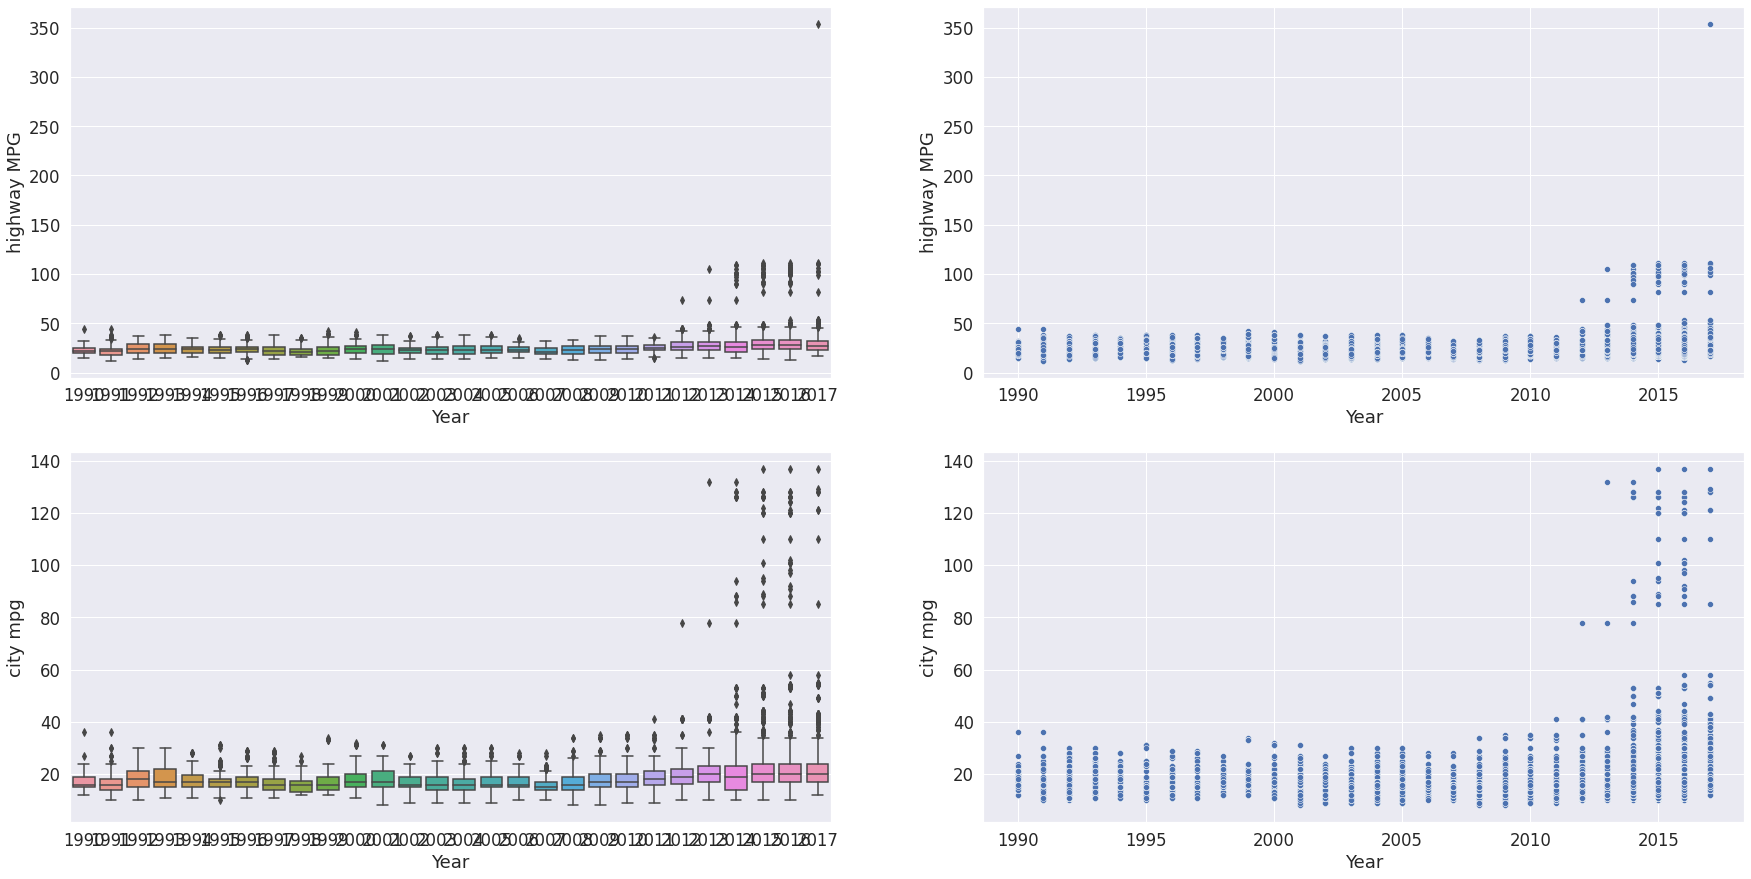

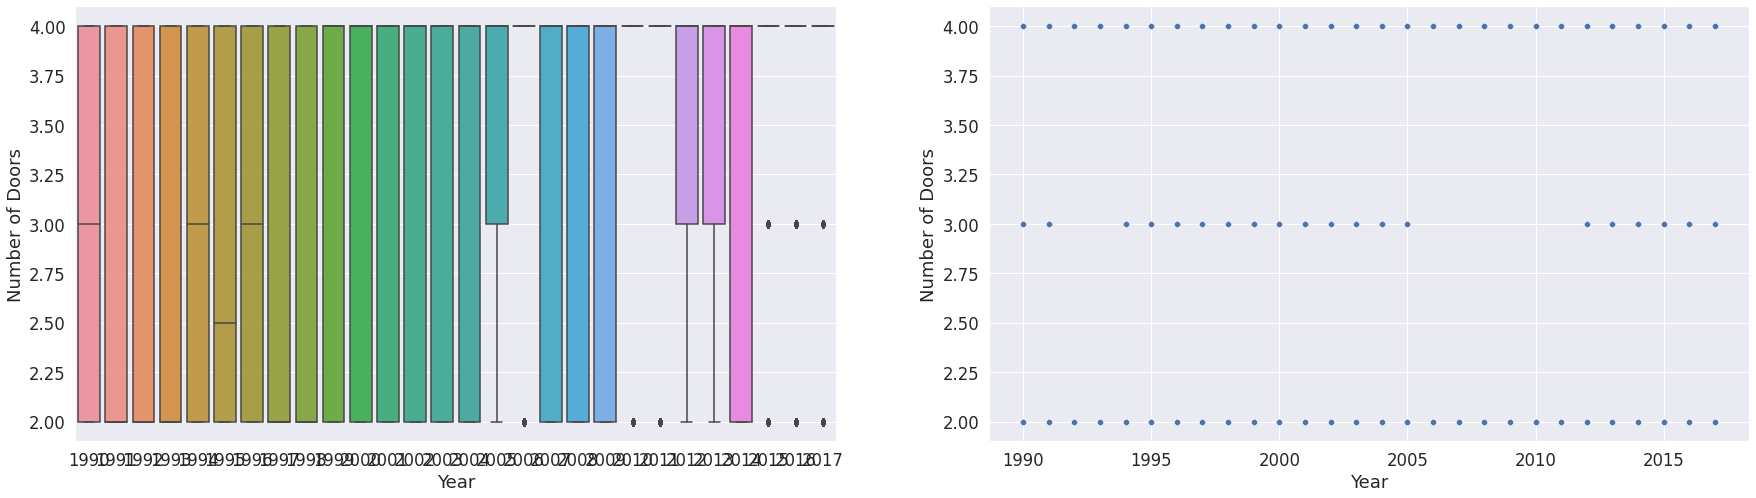

In [ ]:
fig = plt.figure(figsize=(30, 15))
sns.set(font_scale=1.5)

#highway MPG
fig1 = fig.add_subplot(221); 
sns.boxplot(x='Year', y='highway MPG', data=data2)
fig2 = fig.add_subplot(222);
sns.scatterplot(x='Year', y='highway MPG', data=data2)

#city mpg
fig3 = fig.add_subplot(223); 
sns.boxplot(x='Year', y='city mpg', data=data2)
fig4 = fig.add_subplot(224);
sns.scatterplot(x='Year', y='city mpg', data=data2)

#Number of Doors
fig5 = plt.figure(figsize=(30, 8))
fig6 = fig5.add_subplot(121); 
sns.boxplot(x='Year', y='Number of Doors', data=data2)
fig7 = fig5.add_subplot(122);
sns.scatterplot(x='Year', y='Number of Doors', data=data2)

In [ ]:
# city mpg feature

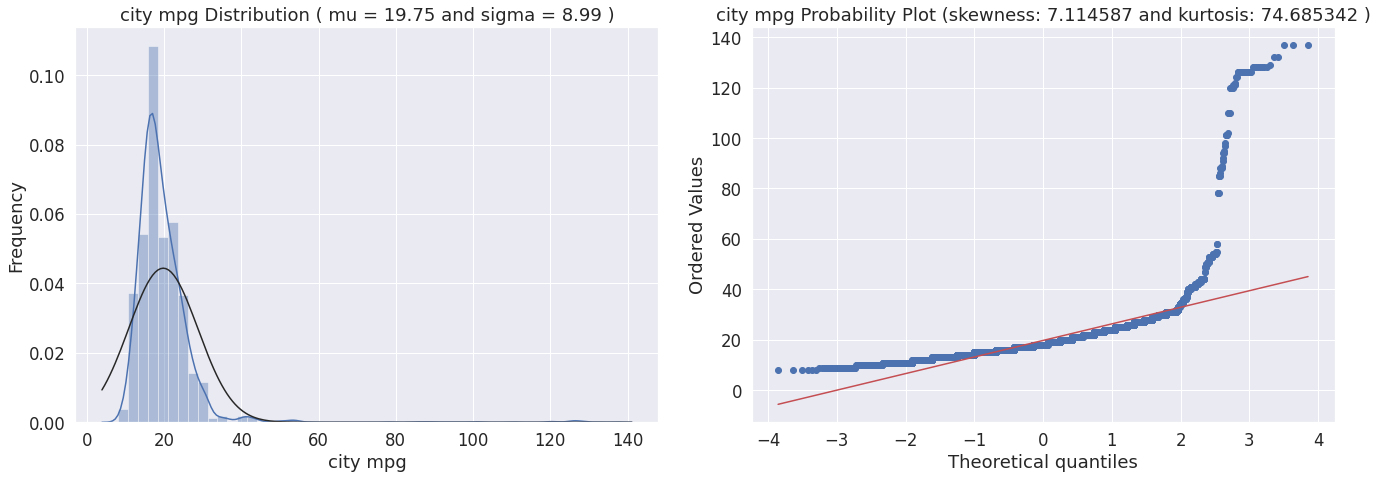

In [ ]:
QQ_plot(data2['city mpg'], 'city mpg')

In [ ]:
# tranform log1p

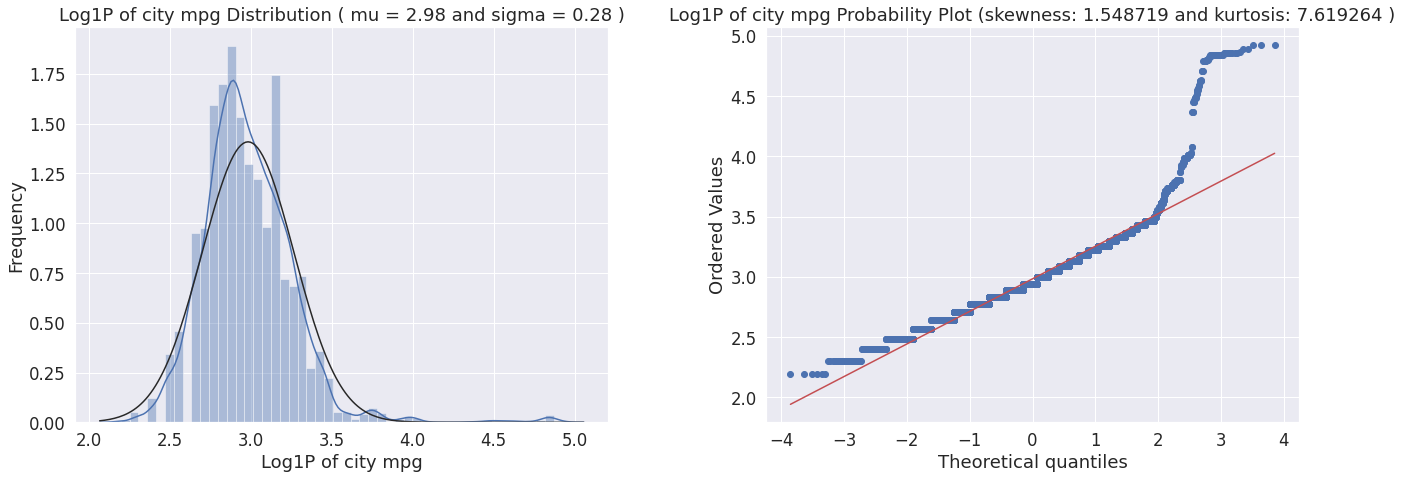

In [ ]:
data2['city mpg'] = np.log1p(data2['city mpg'])

QQ_plot(data2['city mpg'], 'Log1P of city mpg')

In [ ]:
# highway MPG feature

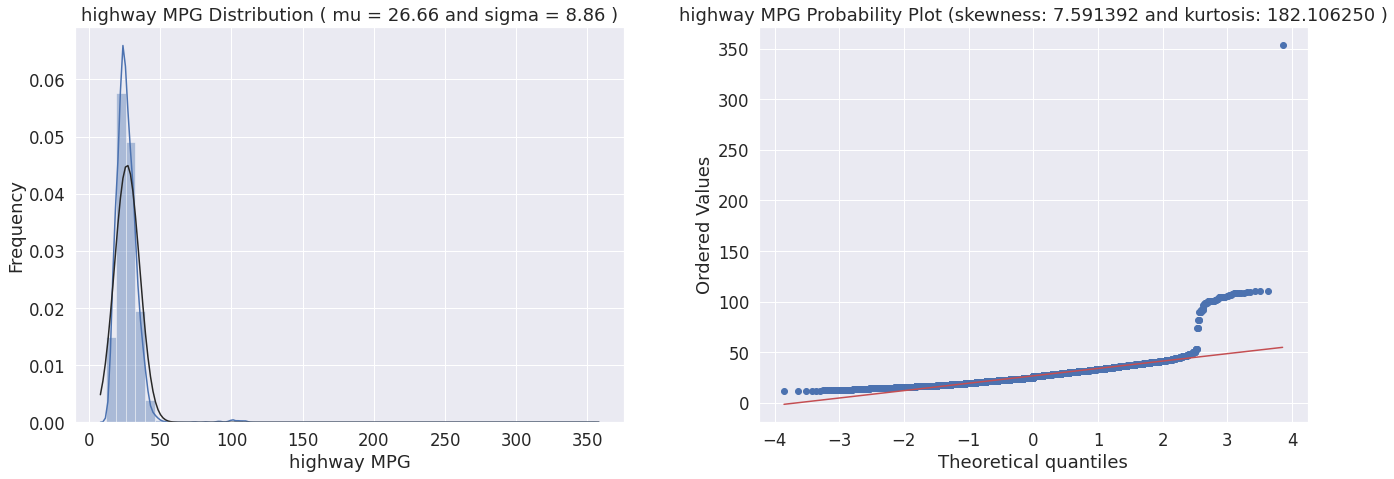

In [ ]:
QQ_plot(data2['highway MPG'], 'highway MPG')

In [ ]:
max_highway_MPG = np.argmax(data2['highway MPG'])
max_highway_MPG

2480

In [ ]:
data2.iloc[max_highway_MPG ,:]

Make                                           Audi
Model                                            A6
Year                                           2017
Engine Fuel Type     premium unleaded (recommended)
Engine HP                                     252.0
Engine Cylinders                                4.0
Transmission Type                  AUTOMATED_MANUAL
Driven_Wheels                     front wheel drive
Number of Doors                                 4.0
Vehicle Size                                Midsize
Vehicle Style                                 Sedan
highway MPG                                     354
city mpg                                   3.218876
Popularity                                     3105
MSRP                                          51600
YearAge                                           5
Name: 1119, dtype: object

In [ ]:
data2.iloc[[2480]]

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP,YearAge
1119,Audi,A6,2017,premium unleaded (recommended),252.0,4.0,AUTOMATED_MANUAL,front wheel drive,4.0,Midsize,Sedan,354,3.218876,3105,51600,5


In [ ]:
# remove outlier
data2 = data2.drop(1119)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11890 entries, 17 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11890 non-null  object 
 1   Model              11890 non-null  object 
 2   Year               11890 non-null  int64  
 3   Engine Fuel Type   11887 non-null  object 
 4   Engine HP          11821 non-null  float64
 5   Engine Cylinders   11860 non-null  float64
 6   Transmission Type  11890 non-null  object 
 7   Driven_Wheels      11890 non-null  object 
 8   Number of Doors    11884 non-null  float64
 9   Vehicle Size       11890 non-null  object 
 10  Vehicle Style      11890 non-null  object 
 11  highway MPG        11890 non-null  int64  
 12  city mpg           11890 non-null  float64
 13  Popularity         11890 non-null  int64  
 14  MSRP               11890 non-null  int64  
 15  YearAge            11890 non-null  int64  
dtypes: float64(4), int64(

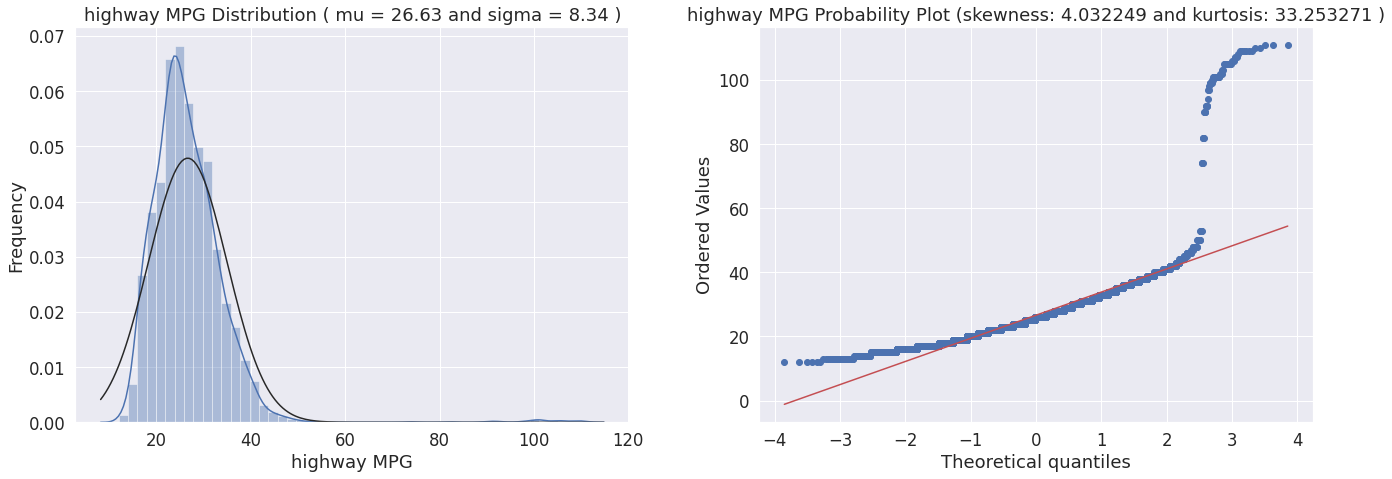

In [ ]:
QQ_plot(data2['highway MPG'], 'highway MPG')

In [ ]:
# tranform log1p

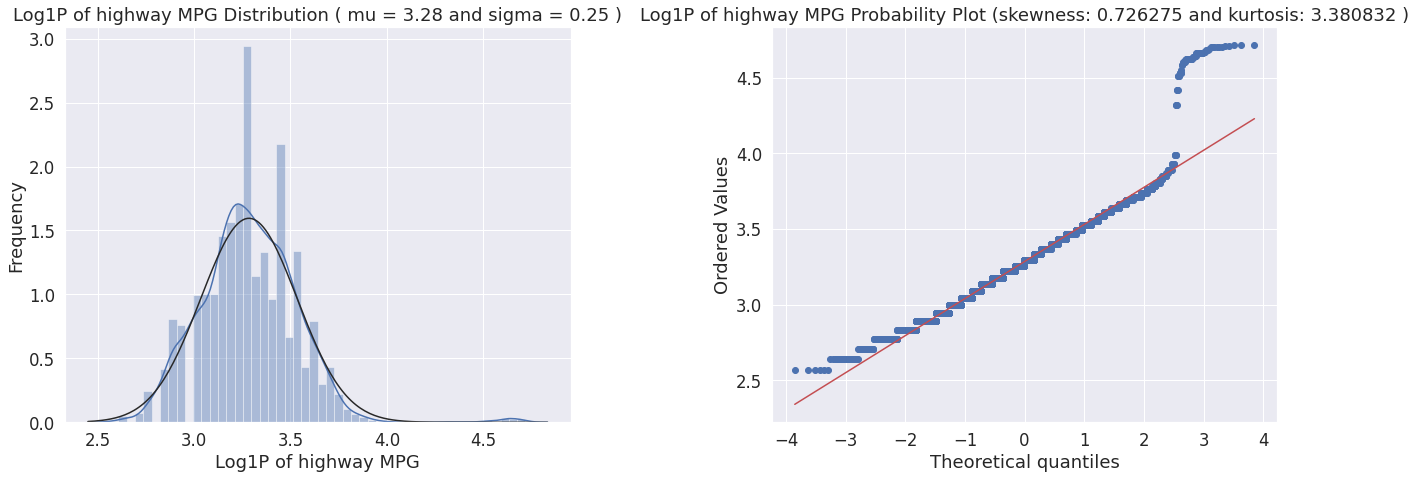

In [ ]:
data2['highway MPG'] = np.log1p(data2['highway MPG'])

QQ_plot(data2['highway MPG'], 'Log1P of highway MPG')

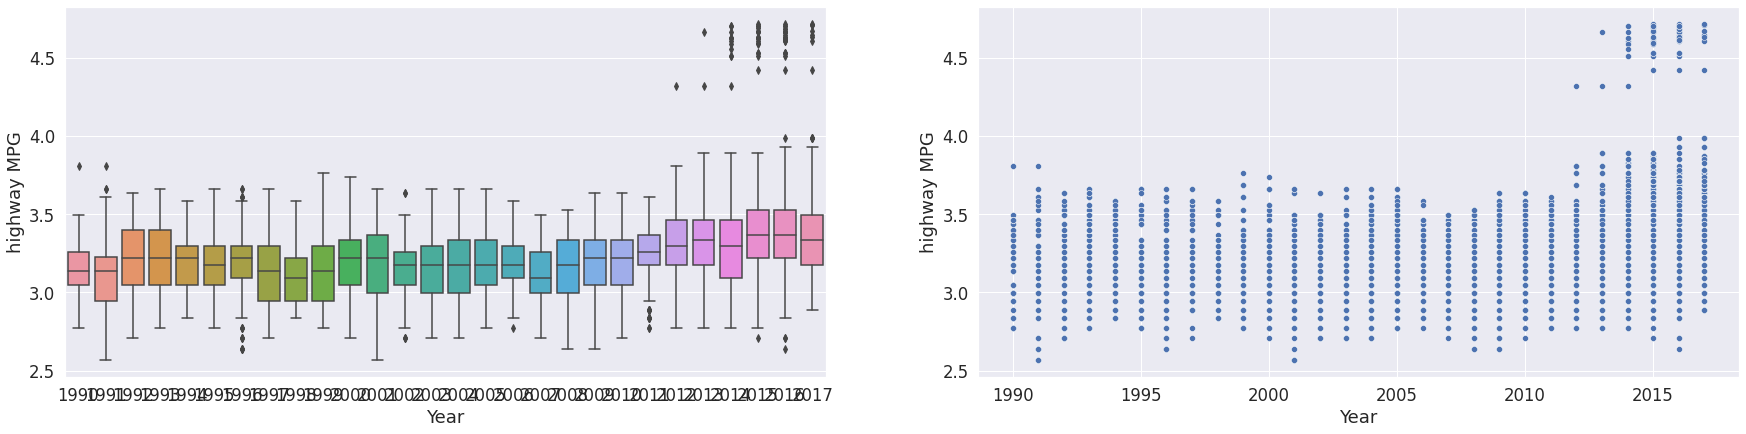

In [ ]:
fig = plt.figure(figsize=(30, 15))
sns.set(font_scale=1.5)

#highway MPG
fig1 = fig.add_subplot(221); 
sns.boxplot(x='Year', y='highway MPG', data=data2)
fig2 = fig.add_subplot(222);
sns.scatterplot(x='Year', y='highway MPG', data=data2)

Numerical feature summary:
- describe Numerical feature
- oulier check and remove
- Transform log1p

###corelation plot

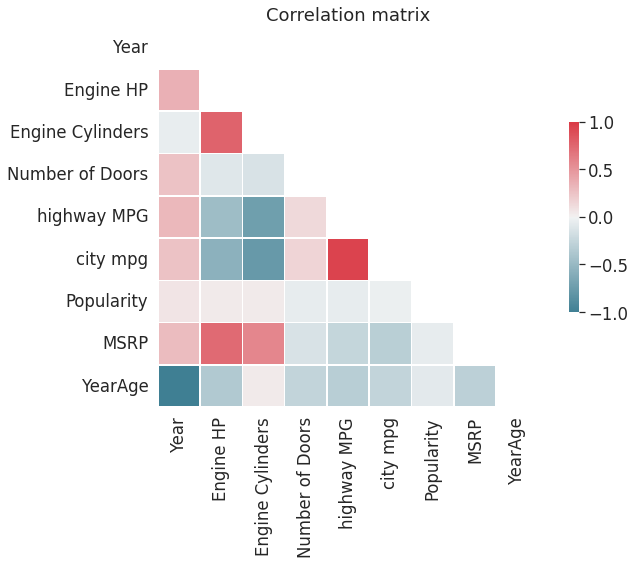

In [ ]:
corr = data2.corr()

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype = np.bool)

# return the indices for the upper triangle of an (n,m) array
mask[np.triu_indices_from(mask)] = True

# Plot
sns.set_style("white")
f, ax = plt.subplots(figsize=(11,7))
plt.title("Correlation matrix")
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220,10, as_cmap=True),
            square=True, vmax = 1, center = 0, linewidths = .5, cbar_kws = {"shrink": .5})

plt.show()

with the color, MSRP high corr with Engine HP and Engine Cylinders.
and Engine HP and Engine Cylinders also high corr each other

In [ ]:
# Print correlation matrix
data2.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,YearAge
Year,1.000000,0.356333,-0.040575,0.261843,0.318121,0.263908,0.072760,0.289559,-1.000000
Engine HP,0.356333,1.000000,0.776353,-0.099111,-0.466683,-0.556389,0.039653,0.738012,-0.356333
Engine Cylinders,-0.040575,0.776353,1.000000,-0.136335,-0.726293,-0.769817,0.043801,0.581189,0.040575
Number of Doors,0.261843,-0.099111,-0.136335,1.000000,0.139270,0.159788,-0.048960,-0.139378,-0.261843
highway MPG,0.318121,-0.466683,-0.726293,0.139270,1.000000,0.947497,-0.050361,-0.249173,-0.318121
city mpg,0.263908,-0.556389,-0.769817,0.159788,0.947497,1.000000,-0.031103,-0.311549,-0.263908
Popularity,0.072760,0.039653,0.043801,-0.048960,-0.050361,-0.031103,1.000000,-0.050402,-0.072760
MSRP,0.289559,0.738012,0.581189,-0.139378,-0.249173,-0.311549,-0.050402,1.000000,-0.289559
YearAge,-1.000000,-0.356333,0.040575,-0.261843,-0.318121,-0.263908,-0.072760,-0.289559,1.000000


###categorical -one hot end coding


In [ ]:
categorical = data2[['Engine Fuel Type','Transmission Type','Driven_Wheels','Vehicle Size', 'Vehicle Style']]
categorical_cols = categorical.columns

for col in categorical_cols:
  data2[col] = data2[col].str.replace('\W', '').str.replace(' ', '_') #.str.lower()

data3 = pd.get_dummies(data2, columns = categorical_cols)

In [ ]:
data3.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP,...,Vehicle Style_Convertible,Vehicle Style_ConvertibleSUV,Vehicle Style_Coupe,Vehicle Style_CrewCabPickup,Vehicle Style_ExtendedCabPickup,Vehicle Style_PassengerMinivan,Vehicle Style_PassengerVan,Vehicle Style_RegularCabPickup,Vehicle Style_Sedan,Vehicle Style_Wagon
17,Audi,100,1992,172.0,6.0,4.0,3.218876,2.890372,3105,2000,...,0,0,0,0,0,0,0,0,1,0
18,Audi,100,1992,172.0,6.0,4.0,3.218876,2.890372,3105,2000,...,0,0,0,0,0,0,0,0,1,0
19,Audi,100,1992,172.0,6.0,4.0,3.044522,2.833213,3105,2000,...,0,0,0,0,0,0,0,0,0,1
20,Audi,100,1992,172.0,6.0,4.0,3.218876,2.890372,3105,2000,...,0,0,0,0,0,0,0,0,1,0
21,Audi,100,1992,172.0,6.0,4.0,3.091042,2.833213,3105,2000,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11890 entries, 17 to 11913
Data columns (total 49 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Make                                                    11890 non-null  object 
 1   Model                                                   11890 non-null  object 
 2   Year                                                    11890 non-null  int64  
 3   Engine HP                                               11821 non-null  float64
 4   Engine Cylinders                                        11860 non-null  float64
 5   Number of Doors                                         11884 non-null  float64
 6   highway MPG                                             11890 non-null  float64
 7   city mpg                                                11890 non-null  float64
 8   Popularity                         

In [ ]:
data3_numeric = data3.select_dtypes(include=['int64','float64','uint8'])

In [ ]:
obs = data3_numeric.shape[0]
types = data3_numeric.dtypes
counts = data3_numeric.apply(lambda x: x.count())
uniques = data3_numeric.apply(lambda x: [x.unique()]).transpose()
nulls = data3_numeric.apply(lambda x: x.isnull().sum())
distincts = data3_numeric.apply(lambda x: x.unique().shape[0])
missing_ration = (data3_numeric.isnull().sum()/ obs) * 100
skewness = data3_numeric.skew()
kurtosis = data3_numeric.kurt() 

In [ ]:
corr = data3_numeric.corr()['MSRP']
corr_col = 'corr '  + 'MSRP'
str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
str.columns = cols
str.sort_values(by ='corr MSRP', ascending=False)

,types,counts,distincts,nulls,missing_ration,uniques,skewness,kurtosis,corr MSRP
MSRP,int64,11890,6029,0,0.000000,"[2000, 2073, 3713, 3520, 3910, 4182, 4107, 429...",4.570885,27.594596,1.000000
Engine HP,float64,11821,355,69,0.580320,"[172.0, 130.0, 158.0, 162.0, 217.0, 115.0, 140...",1.220326,1.816948,0.738012
Engine Cylinders,float64,11860,9,30,0.252313,"[6.0, 4.0, 5.0, 8.0, 12.0, 3.0, nan, 0.0, 10.0]",0.919704,1.746891,0.581189
Engine Fuel Type_premiumunleadedrequired,uint8,11890,2,0,0.000000,"[0, 1]",1.775874,1.153922,0.532447
Year,int64,11890,28,0,0.000000,"[1992, 1993, 1994, 1991, 1990, 1996, 1997, 199...",-1.226480,0.313644,0.289559
Transmission Type_AUTOMATED_MANUAL,uint8,11890,2,0,0.000000,"[0, 1]",4.040980,14.331928,0.228967
Vehicle Style_Convertible,uint8,11890,2,0,0.000000,"[0, 1]",3.493006,10.202806,0.221933
Vehicle Style_Coupe,uint8,11890,2,0,0.000000,"[0, 1]",2.649974,5.023204,0.218543
Driven_Wheels_rearwheeldrive,uint8,11890,2,0,0.000000,"[0, 1]",0.966292,-1.066459,0.190268
Engine Fuel Type_flexfuelpremiumunleadedrequiredE85,uint8,11890,2,0,0.000000,"[0, 1]",14.739218,215.280772,0.169973


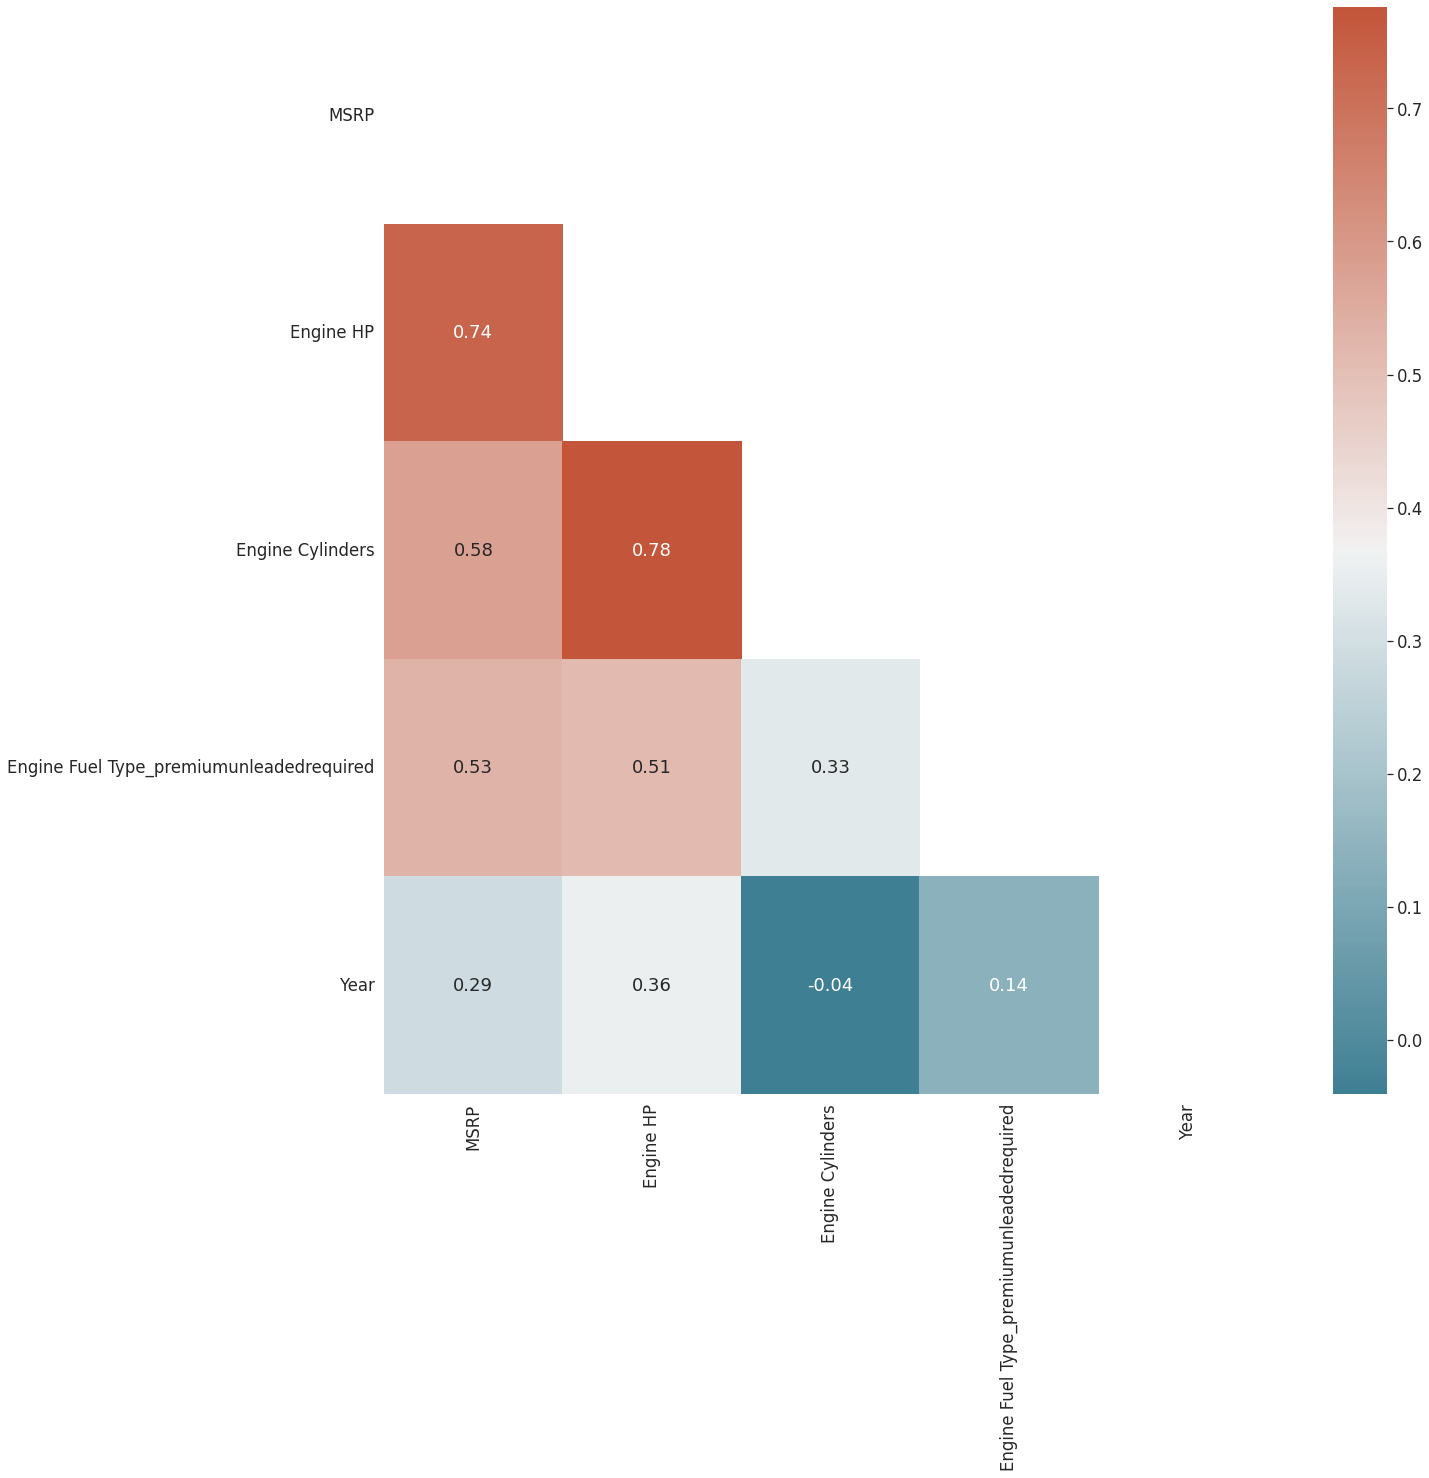

In [ ]:
corr = data3_numeric[data3_numeric.MSRP>1].corr()
top_corr_cols = corr[abs((corr.MSRP)>=.26)].MSRP.sort_values(ascending=False).keys()
top_corr = corr.loc[top_corr_cols, top_corr_cols]
dropSelf = np.zeros_like(top_corr)
dropSelf[np.triu_indices_from(dropSelf)] = True
plt.figure(figsize=(20, 20))
sns.heatmap(top_corr, cmap=sns.diverging_palette(220, 20, as_cmap=True), annot=True, fmt=".2f", mask=dropSelf)
sns.set(font_scale=1.0)
plt.show()
del corr, dropSelf, top_corr

again correration plot, 'MSRP' still high corr with 'Engine HP' and 'Engine Cylinders' and one more frature 'Engine Fuel Type_premiumunleadedrequired'

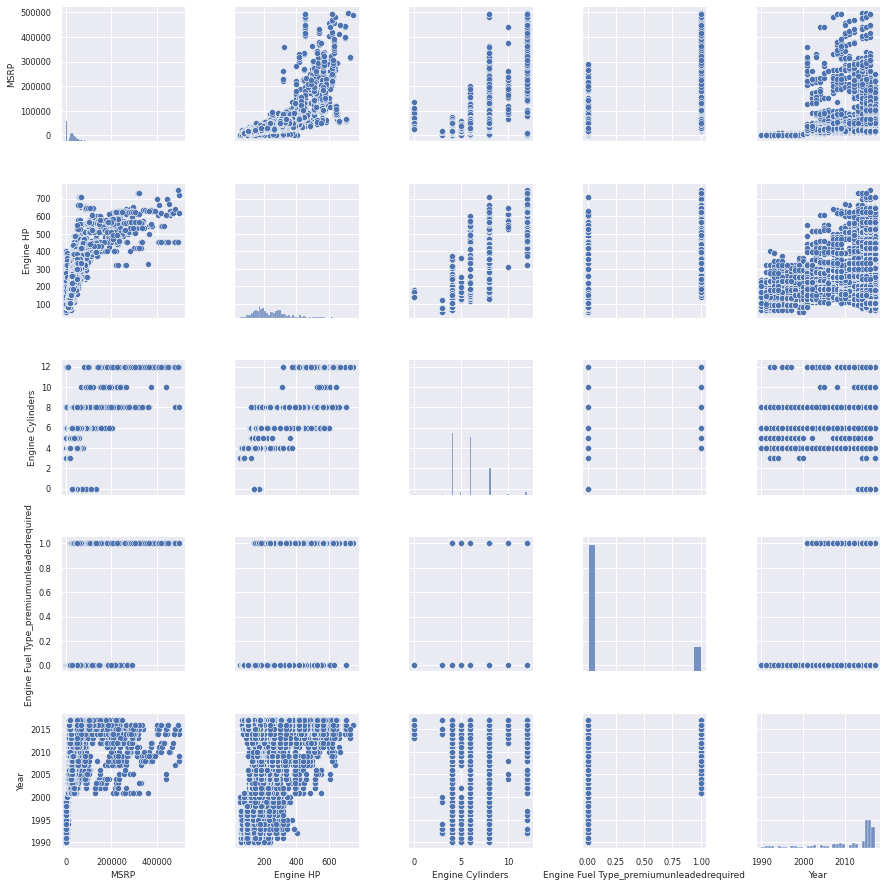

In [ ]:
sns.set(font_scale=0.75)
g = sns.pairplot(data3_numeric.loc[data3.MSRP>0, top_corr_cols[:12]])

scatter plot of MSRP with Engine HP and Engine Cylinders seam to be non-linear.
it seam to be good fit with **polynomial** patterns with degree 2 or 3    

### VIF
after end coding we got much more feature from dummy. it need to remove non-important feature in this case we use VIF to deal with it.

In [ ]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X = data3_numeric.dropna()

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data.sort_values(by = 'VIF' , ascending= True)

,feature,VIF
6,Popularity,1.157336
15,Engine Fuel Type_naturalgas,1.669053
7,MSRP,2.919447
2,Engine Cylinders,5.947691
1,Engine HP,7.641144
11,Engine Fuel Type_flexfuelpremiumunleadedrecomm...,9.688872
10,Engine Fuel Type_electric,12.006071
5,city mpg,13.712228
4,highway MPG,18.146578
3,Number of Doors,19.004688


In [ ]:
# I decide to remove feature perfirm VIF > 20 out
vif_cut = vif_data[vif_data['VIF']<20]

In [ ]:
vif_cut.sort_values(by = 'VIF' , ascending= True)

,feature,VIF
6,Popularity,1.157336
15,Engine Fuel Type_naturalgas,1.669053
7,MSRP,2.919447
2,Engine Cylinders,5.947691
1,Engine HP,7.641144
11,Engine Fuel Type_flexfuelpremiumunleadedrecomm...,9.688872
10,Engine Fuel Type_electric,12.006071
5,city mpg,13.712228
4,highway MPG,18.146578
3,Number of Doors,19.004688


In [ ]:
vif_cols = vif_cut['feature'].values

In [ ]:
vif_cols

array(['Engine HP', 'Engine Cylinders', 'Number of Doors', 'highway MPG',
       'city mpg', 'Popularity', 'MSRP', 'Engine Fuel Type_electric',
       'Engine Fuel Type_flexfuelpremiumunleadedrecommendedE85',
       'Engine Fuel Type_flexfuelpremiumunleadedrequiredE85',
       'Engine Fuel Type_naturalgas'], dtype=object)

In [ ]:
data4 = data3_numeric.copy()
data4 = data4[['Popularity','Engine Fuel Type_naturalgas','MSRP','YearAge', 'Engine Cylinders' ,'Engine HP' ,'Engine Fuel Type_flexfuelpremiumunleadedrecommendedE85' ,'city mpg','Engine Fuel Type_electric','highway MPG','Number of Doors','Engine Fuel Type_flexfuelpremiumunleadedrequiredE85']]

In [ ]:
data3.columns

Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Number of Doors', 'highway MPG', 'city mpg', 'Popularity', 'MSRP',
       'YearAge', 'Engine Fuel Type_diesel', 'Engine Fuel Type_electric',
       'Engine Fuel Type_flexfuelpremiumunleadedrecommendedE85',
       'Engine Fuel Type_flexfuelpremiumunleadedrequiredE85',
       'Engine Fuel Type_flexfuelunleadedE85',
       'Engine Fuel Type_flexfuelunleadednaturalgas',
       'Engine Fuel Type_naturalgas',
       'Engine Fuel Type_premiumunleadedrecommended',
       'Engine Fuel Type_premiumunleadedrequired',
       'Engine Fuel Type_regularunleaded',
       'Transmission Type_AUTOMATED_MANUAL', 'Transmission Type_AUTOMATIC',
       'Transmission Type_DIRECT_DRIVE', 'Transmission Type_MANUAL',
       'Transmission Type_UNKNOWN', 'Driven_Wheels_allwheeldrive',
       'Driven_Wheels_fourwheeldrive', 'Driven_Wheels_frontwheeldrive',
       'Driven_Wheels_rearwheeldrive', 'Vehicle Size_Compact',
       'Vehicle Size_Larg

In [ ]:
data3a = data3[['Make','Model','Year']]

In [ ]:
data4 = pd.concat([data3a, data4], axis = 1)

In [ ]:
data4.shape

(11890, 15)

In [ ]:
data4.head()

,Make,Model,Year,Popularity,Engine Fuel Type_naturalgas,MSRP,YearAge,Engine Cylinders,Engine HP,Engine Fuel Type_flexfuelpremiumunleadedrecommendedE85,city mpg,Engine Fuel Type_electric,highway MPG,Number of Doors,Engine Fuel Type_flexfuelpremiumunleadedrequiredE85
17,Audi,100,1992,3105,0,2000,30,6.0,172.0,0,2.890372,0,3.218876,4.0,0
18,Audi,100,1992,3105,0,2000,30,6.0,172.0,0,2.890372,0,3.218876,4.0,0
19,Audi,100,1992,3105,0,2000,30,6.0,172.0,0,2.833213,0,3.044522,4.0,0
20,Audi,100,1992,3105,0,2000,30,6.0,172.0,0,2.890372,0,3.218876,4.0,0
21,Audi,100,1992,3105,0,2000,30,6.0,172.0,0,2.833213,0,3.091042,4.0,0


In [ ]:
obs = data4.shape[0]
types = data4.dtypes
counts = data4.apply(lambda x: x.count())
uniques = data4.apply(lambda x: [x.unique()]).transpose()
nulls = data4.apply(lambda x: x.isnull().sum())
distincts = data4.apply(lambda x: x.unique().shape[0])
missing_ration = (data4.isnull().sum()/ obs) * 100
skewness = data4.skew()
kurtosis = data4.kurt() 

In [ ]:
corr = data4.corr()['MSRP']
corr_col = 'corr '  + 'MSRP'
str = pd.concat([types, counts, distincts, nulls, missing_ration, uniques, skewness, kurtosis, corr], axis = 1, sort=False)
cols = ['types', 'counts', 'distincts', 'nulls', 'missing_ration', 'uniques', 'skewness', 'kurtosis', corr_col ]
str.columns = cols
str.sort_values(by ='corr MSRP', ascending=False)

,types,counts,distincts,nulls,missing_ration,uniques,skewness,kurtosis,corr MSRP
MSRP,int64,11890,6029,0,0.000000,"[2000, 2073, 3713, 3520, 3910, 4182, 4107, 429...",4.570885,27.594596,1.000000
Engine HP,float64,11821,355,69,0.580320,"[172.0, 130.0, 158.0, 162.0, 217.0, 115.0, 140...",1.220326,1.816948,0.738012
Engine Cylinders,float64,11860,9,30,0.252313,"[6.0, 4.0, 5.0, 8.0, 12.0, 3.0, nan, 0.0, 10.0]",0.919704,1.746891,0.581189
Year,int64,11890,28,0,0.000000,"[1992, 1993, 1994, 1991, 1990, 1996, 1997, 199...",-1.226480,0.313644,0.289559
Engine Fuel Type_flexfuelpremiumunleadedrequiredE85,uint8,11890,2,0,0.000000,"[0, 1]",14.739218,215.280772,0.169973
Engine Fuel Type_electric,uint8,11890,2,0,0.000000,"[0, 1]",13.311717,175.231281,0.013073
Engine Fuel Type_flexfuelpremiumunleadedrecommendedE85,uint8,11890,2,0,0.000000,"[0, 1]",21.317236,452.500652,0.008878
Engine Fuel Type_naturalgas,uint8,11890,2,0,0.000000,"[0, 1]",77.094097,5942.499327,-0.003145
Popularity,int64,11890,47,0,0.000000,"[3105, 617, 2009, 870, 436, 586, 210, 3916, 37...",1.652800,2.271709,-0.050402
Number of Doors,float64,11884,4,6,0.050463,"[4.0, 2.0, 3.0, nan]",-0.974785,-0.996856,-0.139378


In [ ]:
data4 = data4.dropna()

In [ ]:
data4.shape

(11791, 15)

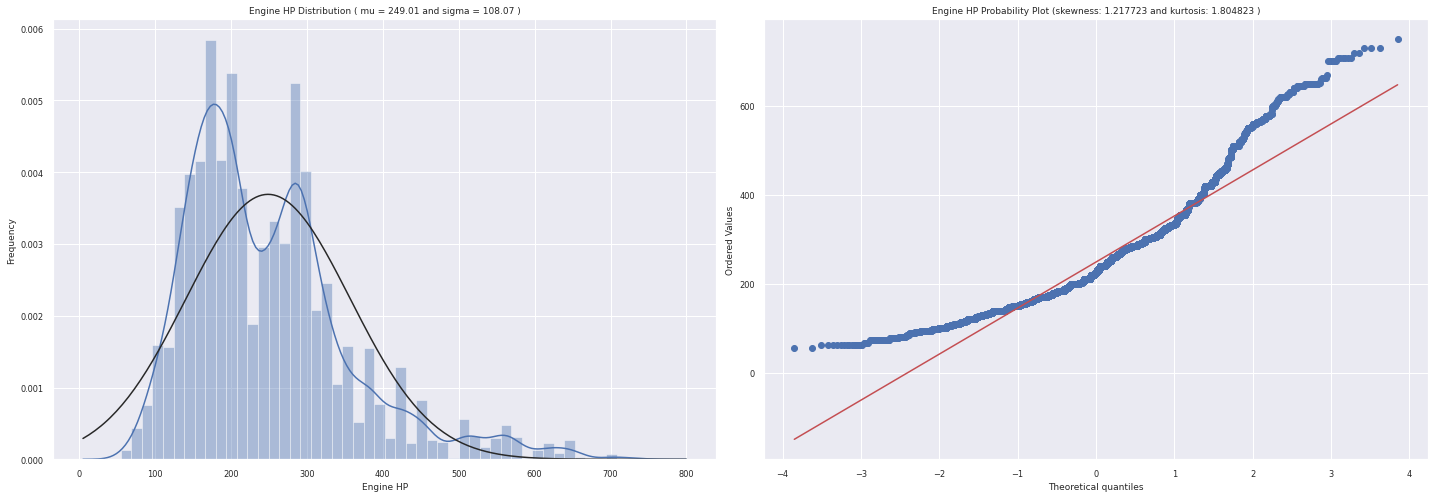

In [ ]:
QQ_plot(data4['Engine HP'], 'Engine HP')

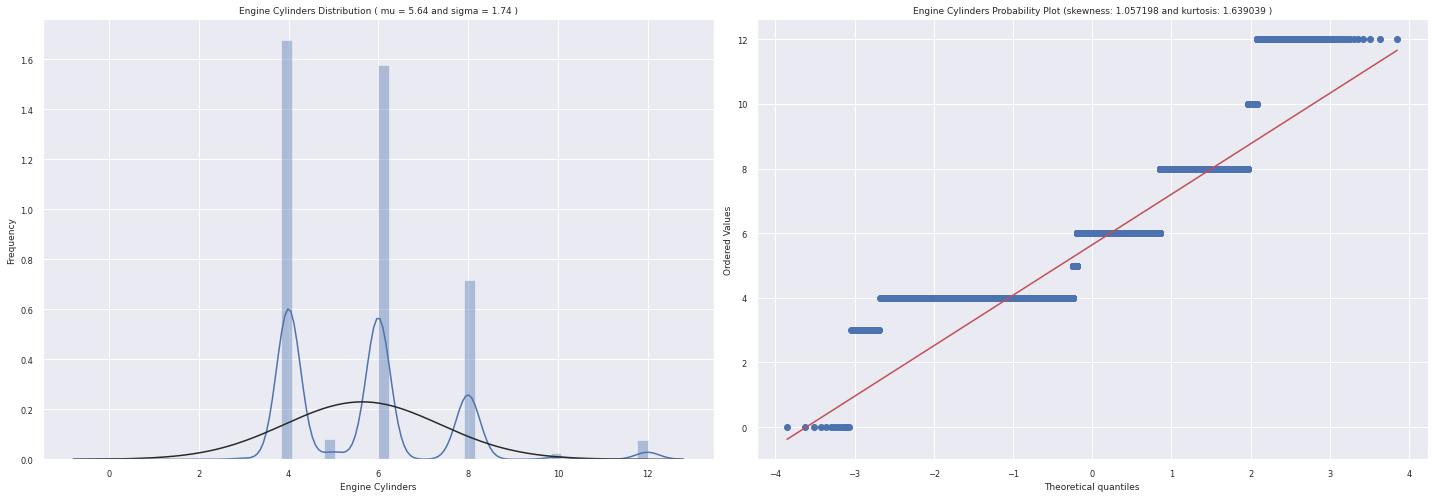

In [ ]:
QQ_plot(data4['Engine Cylinders'], 'Engine Cylinders')

### polynomial 
- as you can see above I mentioned scatter plot of MSRP with Engine HP and Engine Cylinders seam to be non-linear.
it seam to be good fit with **polynomial** patterns with degree 2 or 3    
- therefore it better to get **PolynomialFeatures** X^2 and X^3 to train data

In [ ]:
#polynomial 

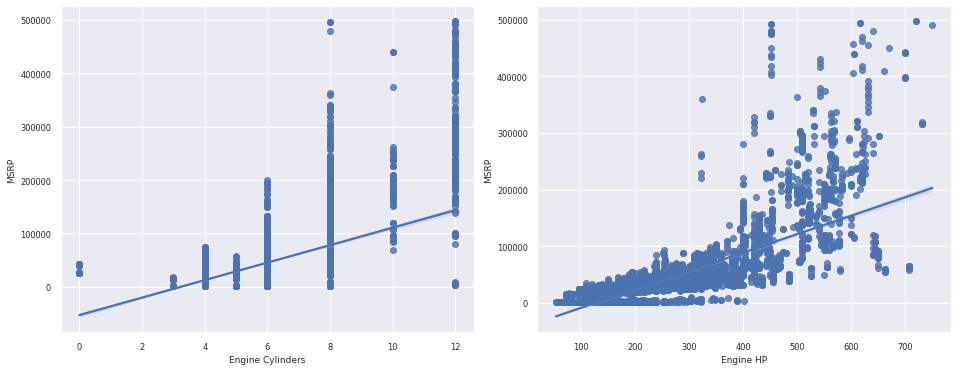

In [ ]:
fig = plt.figure(figsize=(20,15)) 
ax = fig.add_subplot(332); g = sns.regplot(y='MSRP', x='Engine HP', data = data4[data4.MSRP>0], order=1) 
ax = fig.add_subplot(331); g = sns.regplot(y='MSRP', x='Engine Cylinders', data = data4[data4.MSRP>0], order=1) 

plt.tight_layout() 

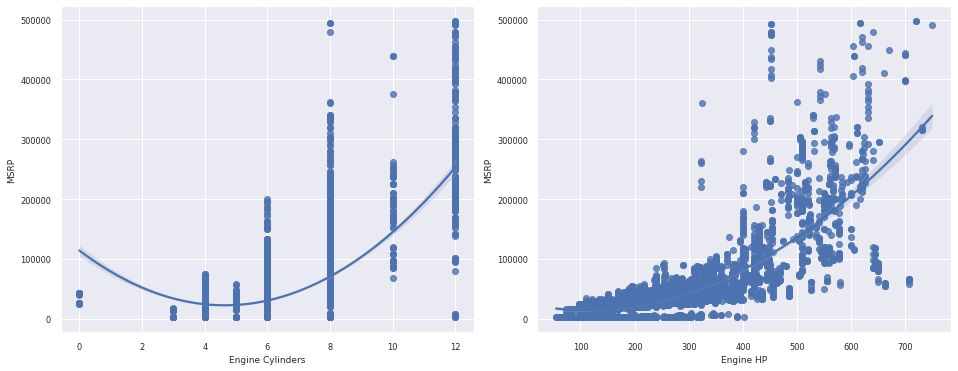

In [ ]:
fig = plt.figure(figsize=(20,15)) 
ax = fig.add_subplot(332); g = sns.regplot(y='MSRP', x='Engine HP', data = data4[data4.MSRP>0], order=2) 
ax = fig.add_subplot(331); g = sns.regplot(y='MSRP', x='Engine Cylinders', data = data4[data4.MSRP>0], order=2) 

plt.tight_layout() 

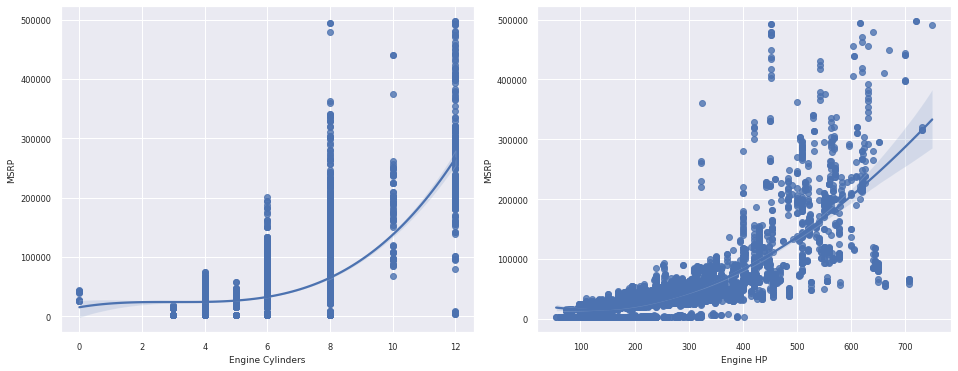

In [ ]:
fig = plt.figure(figsize=(20,15)) 
ax = fig.add_subplot(332); g = sns.regplot(y='MSRP', x='Engine HP', data = data4[data4.MSRP>0], order=3)
ax = fig.add_subplot(331); g = sns.regplot(y='MSRP', x='Engine Cylinders', data = data4[data4.MSRP>0], order=3) 

plt.tight_layout() 

In [ ]:
from sklearn.preprocessing import RobustScaler, PolynomialFeatures, StandardScaler, LabelEncoder

In [ ]:
poly_cols = ['Engine HP', 'Engine Cylinders']

pf = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)
res = pf.fit_transform(data4.loc[:, poly_cols])

target_feature_names = [feat.replace(' ','_') for feat in pf.get_feature_names(poly_cols)]
output_df = pd.DataFrame(res, columns = target_feature_names,  index=data4.index).iloc[:, len(poly_cols):]
print('Polynomial Features included:', output_df.shape[1])
display(output_df.head())
data4 = pd.concat([data4, output_df], axis=1)
print('Total Features after Polynomial Features included:', data4.shape[1])
colsP = output_df.columns

del output_df, target_feature_names, res, pf

Polynomial Features included: 7


,Engine_HP^2,Engine_HP_Engine_Cylinders,Engine_Cylinders^2,Engine_HP^3,Engine_HP^2_Engine_Cylinders,Engine_HP_Engine_Cylinders^2,Engine_Cylinders^3
17,29584.0,1032.0,36.0,5088448.0,177504.0,6192.0,216.0
18,29584.0,1032.0,36.0,5088448.0,177504.0,6192.0,216.0
19,29584.0,1032.0,36.0,5088448.0,177504.0,6192.0,216.0
20,29584.0,1032.0,36.0,5088448.0,177504.0,6192.0,216.0
21,29584.0,1032.0,36.0,5088448.0,177504.0,6192.0,216.0


Total Features after Polynomial Features included: 22


In [ ]:
data4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11791 entries, 17 to 11913
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Make                                                    11791 non-null  object 
 1   Model                                                   11791 non-null  object 
 2   Year                                                    11791 non-null  int64  
 3   Popularity                                              11791 non-null  int64  
 4   Engine Fuel Type_naturalgas                             11791 non-null  uint8  
 5   MSRP                                                    11791 non-null  int64  
 6   YearAge                                                 11791 non-null  int64  
 7   Engine Cylinders                                        11791 non-null  float64
 8   Engine HP                          

In [ ]:
data4.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,11791.0,2.010373e+03,7.588905e+00,1990.000000,2.007000e+03,2.015000e+03,2.016000e+03,2.017000e+03
Popularity,11791.0,1.554241e+03,1.440777e+03,2.000000,5.490000e+02,1.385000e+03,2.009000e+03,5.657000e+03
Engine Fuel Type_naturalgas,11791.0,1.696209e-04,1.302331e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
MSRP,11791.0,3.956292e+04,4.770978e+04,2000.000000,2.099000e+04,2.995000e+04,4.215000e+04,4.976500e+05
YearAge,11791.0,1.162700e+01,7.588905e+00,5.000000,6.000000e+00,7.000000e+00,1.500000e+01,3.200000e+01
Engine Cylinders,11791.0,5.641676e+00,1.736918e+00,0.000000,4.000000e+00,6.000000e+00,6.000000e+00,1.200000e+01
Engine HP,11791.0,2.490142e+02,1.080759e+02,55.000000,1.700000e+02,2.270000e+02,3.000000e+02,7.500000e+02
Engine Fuel Type_flexfuelpremiumunleadedrecommendedE85,11791.0,2.205072e-03,4.690838e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
city mpg,11791.0,2.976106e+00,2.589551e-01,2.197225,2.833213e+00,2.944439e+00,3.135494e+00,4.927254e+00
Engine Fuel Type_electric,11791.0,1.102536e-03,3.318755e-02,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


### Target endcoding
- at first I removed make and model, two feature represent brand and model of the car to prevent domination of brand over other feature
- but I re-consider it can handel both with TARGER ENDCODING that convert values to average of Target in each values contain in features.

In [ ]:
shuffled_data = shuffle(data4, random_state = 100)
X = shuffled_data.drop(['MSRP'], axis = 1)
y = shuffled_data['MSRP']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [ ]:
X_train.head()

,Make,Model,Year,Popularity,Engine Fuel Type_naturalgas,YearAge,Engine Cylinders,Engine HP,Engine Fuel Type_flexfuelpremiumunleadedrecommendedE85,city mpg,...,highway MPG,Number of Doors,Engine Fuel Type_flexfuelpremiumunleadedrequiredE85,Engine_HP^2,Engine_HP_Engine_Cylinders,Engine_Cylinders^2,Engine_HP^3,Engine_HP^2_Engine_Cylinders,Engine_HP_Engine_Cylinders^2,Engine_Cylinders^3
2706,Chevrolet,Classic,2005,1385,0,17,4.0,140.0,0,3.135494,...,3.465736,4.0,0,19600.0,560.0,16.0,2744000.0,78400.0,2240.0,64.0
8148,Dodge,Ram Pickup 1500,2008,1851,0,14,8.0,310.0,0,2.639057,...,2.890372,2.0,0,96100.0,2480.0,64.0,29791000.0,768800.0,19840.0,512.0
6360,Plymouth,Laser,1994,535,0,28,4.0,195.0,0,2.944439,...,3.178054,2.0,0,38025.0,780.0,16.0,7414875.0,152100.0,3120.0,64.0
11042,Toyota,Tundra,2017,2031,0,5,8.0,381.0,0,2.639057,...,2.890372,4.0,0,145161.0,3048.0,64.0,55306341.0,1161288.0,24384.0,512.0
7398,Chrysler,Pacifica,2007,1013,0,15,6.0,200.0,0,2.833213,...,3.178054,4.0,0,40000.0,1200.0,36.0,8000000.0,240000.0,7200.0,216.0


In [ ]:
encoder = TargetEncoder(cols = 'Year')
encoder.fit(X_train['Year'], y_train.to_frame()['MSRP'] )
X_train['Year'] = encoder.transform(X_train['Year'])
X_test['Year'] = encoder.transform(X_test['Year'])
X_train.head()

,Make,Model,Year,Popularity,Engine Fuel Type_naturalgas,YearAge,Engine Cylinders,Engine HP,Engine Fuel Type_flexfuelpremiumunleadedrecommendedE85,city mpg,...,highway MPG,Number of Doors,Engine Fuel Type_flexfuelpremiumunleadedrequiredE85,Engine_HP^2,Engine_HP_Engine_Cylinders,Engine_Cylinders^2,Engine_HP^3,Engine_HP^2_Engine_Cylinders,Engine_HP_Engine_Cylinders^2,Engine_Cylinders^3
2706,Chevrolet,Classic,37907.766871,1385,0,17,4.0,140.0,0,3.135494,...,3.465736,4.0,0,19600.0,560.0,16.0,2744000.0,78400.0,2240.0,64.0
8148,Dodge,Ram Pickup 1500,38917.945455,1851,0,14,8.0,310.0,0,2.639057,...,2.890372,2.0,0,96100.0,2480.0,64.0,29791000.0,768800.0,19840.0,512.0
6360,Plymouth,Laser,2137.580153,535,0,28,4.0,195.0,0,2.944439,...,3.178054,2.0,0,38025.0,780.0,16.0,7414875.0,152100.0,3120.0,64.0
11042,Toyota,Tundra,41701.127988,2031,0,5,8.0,381.0,0,2.639057,...,2.890372,4.0,0,145161.0,3048.0,64.0,55306341.0,1161288.0,24384.0,512.0
7398,Chrysler,Pacifica,33378.230769,1013,0,15,6.0,200.0,0,2.833213,...,3.178054,4.0,0,40000.0,1200.0,36.0,8000000.0,240000.0,7200.0,216.0


In [ ]:
encoder = TargetEncoder(cols = 'Model')
encoder.fit(X_train['Model'], y_train.to_frame()['MSRP'])
X_train['Model'] = encoder.transform(X_train['Model'])
X_test['Model'] = encoder.transform(X_test['Model'])
X_train.head()

,Make,Model,Year,Popularity,Engine Fuel Type_naturalgas,YearAge,Engine Cylinders,Engine HP,Engine Fuel Type_flexfuelpremiumunleadedrecommendedE85,city mpg,...,highway MPG,Number of Doors,Engine Fuel Type_flexfuelpremiumunleadedrequiredE85,Engine_HP^2,Engine_HP_Engine_Cylinders,Engine_Cylinders^2,Engine_HP^3,Engine_HP^2_Engine_Cylinders,Engine_HP_Engine_Cylinders^2,Engine_Cylinders^3
2706,Chevrolet,39383.972646,37907.766871,1385,0,17,4.0,140.0,0,3.135494,...,3.465736,4.0,0,19600.0,560.0,16.0,2744000.0,78400.0,2240.0,64.0
8148,Dodge,31019.795918,38917.945455,1851,0,14,8.0,310.0,0,2.639057,...,2.890372,2.0,0,96100.0,2480.0,64.0,29791000.0,768800.0,19840.0,512.0
6360,Plymouth,2034.058713,2137.580153,535,0,28,4.0,195.0,0,2.944439,...,3.178054,2.0,0,38025.0,780.0,16.0,7414875.0,152100.0,3120.0,64.0
11042,Toyota,37452.136752,41701.127988,2031,0,5,8.0,381.0,0,2.639057,...,2.890372,4.0,0,145161.0,3048.0,64.0,55306341.0,1161288.0,24384.0,512.0
7398,Chrysler,30691.448219,33378.230769,1013,0,15,6.0,200.0,0,2.833213,...,3.178054,4.0,0,40000.0,1200.0,36.0,8000000.0,240000.0,7200.0,216.0


In [ ]:
encoder = TargetEncoder(cols = 'Make')
encoder.fit(X_train['Make'], y_train.to_frame()['MSRP'])
X_train['Make'] = encoder.transform(X_train['Make'])
X_test['Make'] = encoder.transform(X_test['Make'])
X_train.head()

,Make,Model,Year,Popularity,Engine Fuel Type_naturalgas,YearAge,Engine Cylinders,Engine HP,Engine Fuel Type_flexfuelpremiumunleadedrecommendedE85,city mpg,...,highway MPG,Number of Doors,Engine Fuel Type_flexfuelpremiumunleadedrequiredE85,Engine_HP^2,Engine_HP_Engine_Cylinders,Engine_Cylinders^2,Engine_HP^3,Engine_HP^2_Engine_Cylinders,Engine_HP_Engine_Cylinders^2,Engine_Cylinders^3
2706,27896.236870,39383.972646,37907.766871,1385,0,17,4.0,140.0,0,3.135494,...,3.465736,4.0,0,19600.0,560.0,16.0,2744000.0,78400.0,2240.0,64.0
8148,22151.551793,31019.795918,38917.945455,1851,0,14,8.0,310.0,0,2.639057,...,2.890372,2.0,0,96100.0,2480.0,64.0,29791000.0,768800.0,19840.0,512.0
6360,2748.118644,2034.058713,2137.580153,535,0,28,4.0,195.0,0,2.944439,...,3.178054,2.0,0,38025.0,780.0,16.0,7414875.0,152100.0,3120.0,64.0
11042,29048.557432,37452.136752,41701.127988,2031,0,5,8.0,381.0,0,2.639057,...,2.890372,4.0,0,145161.0,3048.0,64.0,55306341.0,1161288.0,24384.0,512.0
7398,26457.829787,30691.448219,33378.230769,1013,0,15,6.0,200.0,0,2.833213,...,3.178054,4.0,0,40000.0,1200.0,36.0,8000000.0,240000.0,7200.0,216.0


### Scale data and create measurable to measure the error

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

In [ ]:
error_mean_square = []
error_mean_absolute = []

##Modeling

In [ ]:
#Linear Regression

model = LinearRegression()
model.fit(X_train_new, y_train)

y_predict = model.predict(X_test_new)

error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np
def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
run_experiment(model)

R^2 :  0.9052942081382062
MAE : 5894.134393648064
RMSE: 14824.395978591


In [ ]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])

In [ ]:
y_predict.head()

,Predicted Output
0,34939.197998
1,20600.601853
2,35240.922003
3,45152.750904
4,2281.011709


In [ ]:
y_test.to_frame().head()

,MSRP
10764,42045
4731,24230
223,41135
3559,50750
8923,2286


In [ ]:
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)
results.head()

,Predicted Output,MSRP
0,34939.197998,42045
1,20600.601853,24230
2,35240.922003,41135
3,45152.750904,50750
4,2281.011709,2286


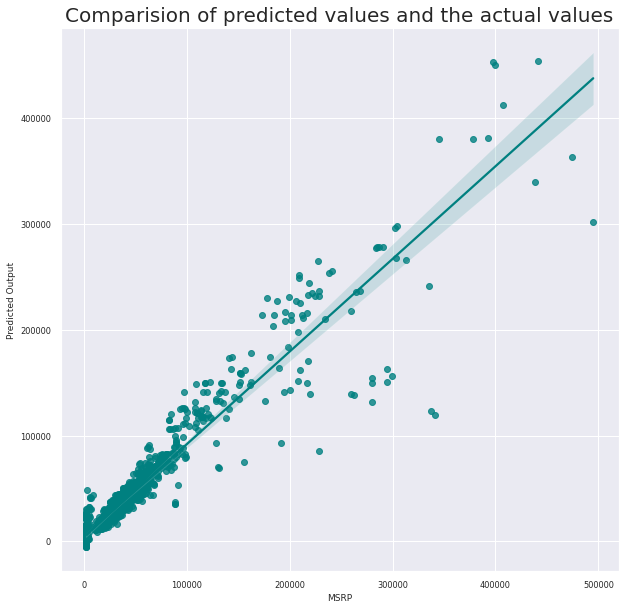

In [ ]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'teal', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [ ]:
#Support Vector Regressor
model = SVR()
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

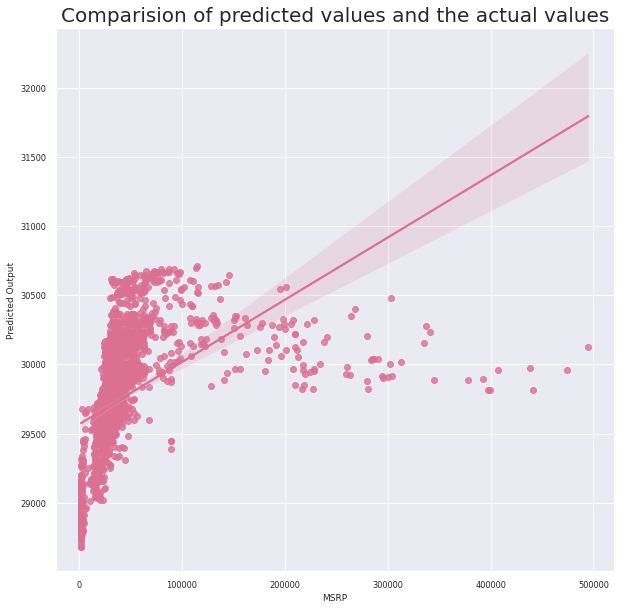

In [ ]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'palevioletred', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [ ]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [ ]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])

In [ ]:
y_test.to_frame().head()

,MSRP
10764,42045
4731,24230
223,41135
3559,50750
8923,2286


In [ ]:
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)
results.head()

,Predicted Output,MSRP
0,30184.971241,42045
1,29621.987159,24230
2,30155.298346,41135
3,29932.118248,50750
4,28975.984042,2286


In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np
def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
run_experiment(model)

R^2 :  -0.026995483837657153
MAE : 22447.44462884043
RMSE: 48817.215517736986


In [ ]:
#K - Neighbors Regressor
model = KNeighborsRegressor(n_neighbors = 2)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

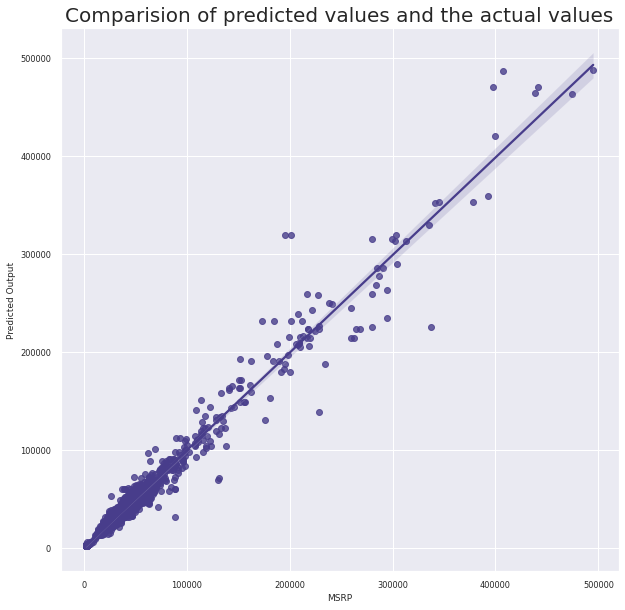

In [ ]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'darkslateblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [ ]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [ ]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])

In [ ]:
y_test.to_frame().head()

,MSRP
10764,42045
4731,24230
223,41135
3559,50750
8923,2286


In [ ]:
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)
results.head()

,Predicted Output,MSRP
0,34975.0,42045
1,25742.5,24230
2,40055.0,41135
3,45187.5,50750
4,2465.0,2286


In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np
def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
run_experiment(model)

R^2 :  0.8965112842522994
MAE : 4571.582874099195
RMSE: 15496.557639591889


In [ ]:
#PLS Regression

model = PLSRegression(n_components = 20)
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

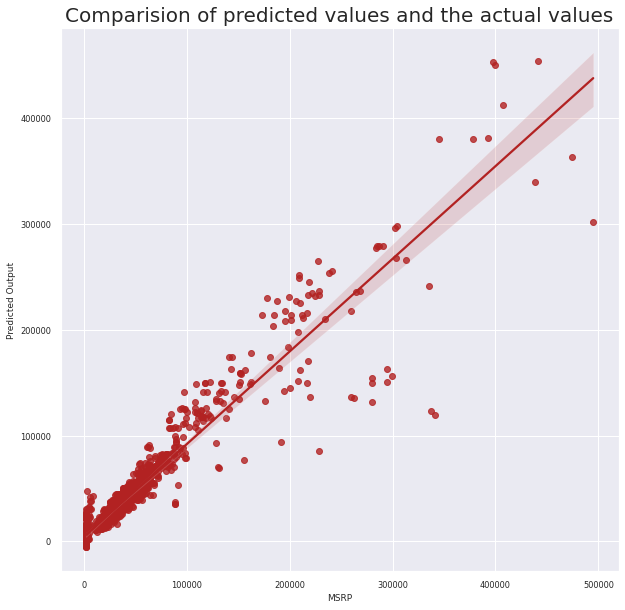

In [ ]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'firebrick', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [ ]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [ ]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
y_test.to_frame().head()
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)
results.head()

,Predicted Output,MSRP
0,34893.584490,42045
1,20671.170648,24230
2,35197.435133,41135
3,45283.504459,50750
4,2256.760394,2286


In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np
def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
run_experiment(model)

R^2 :  0.905193291846517
MAE : 5888.156521503185
RMSE: 14832.292141643034


In [ ]:
#Decision Tree Regressor

model = DecisionTreeRegressor(splitter = 'random')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

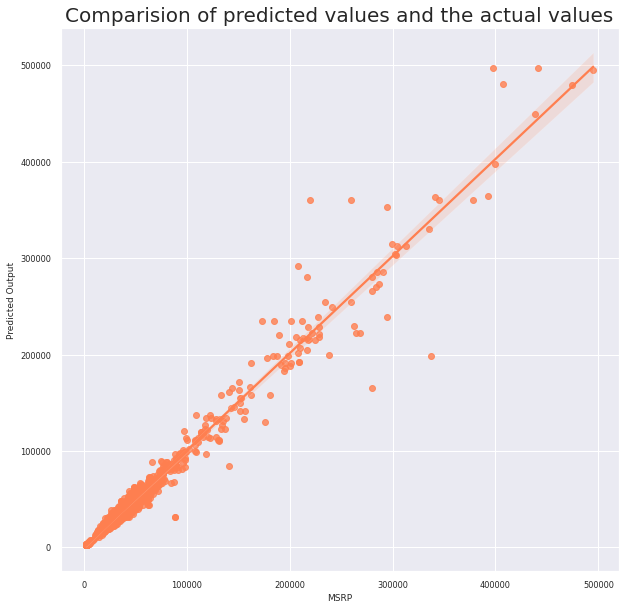

In [ ]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'coral', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [ ]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [ ]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
y_test.to_frame().head()
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)
results.head()

,Predicted Output,MSRP
0,43145.0,42045
1,26380.0,24230
2,40055.0,41135
3,45975.0,50750
4,2465.0,2286


In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np
def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
run_experiment(model)

R^2 :  0.9698490430037332
MAE : 3496.564466601177
RMSE: 8364.48656275535


In [ ]:
# GradientBoostingRegressor

model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

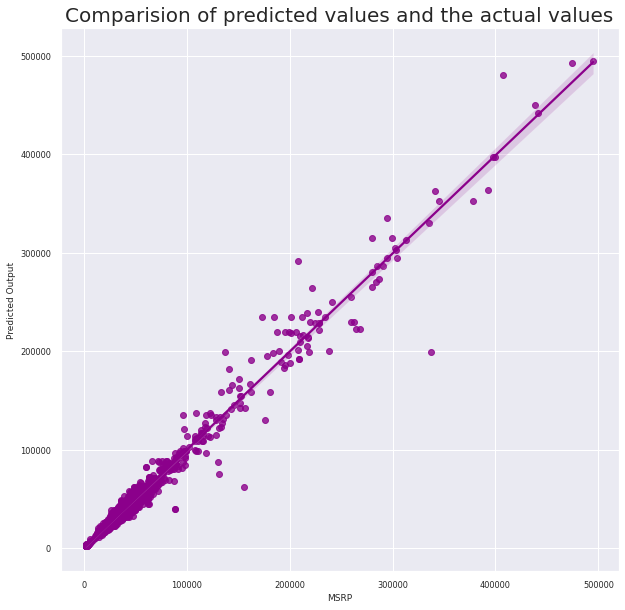

In [ ]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'darkmagenta', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [ ]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [ ]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
y_test.to_frame().head()
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)
results.head()

,Predicted Output,MSRP
0,43935.0,42045
1,26380.0,24230
2,40055.0,41135
3,44400.0,50750
4,2384.0,2286


In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np
def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
run_experiment(model)

R^2 :  0.9646643736111932
MAE : 3526.6948890965846
RMSE: 9055.139272757722


In [ ]:
# MLPRegressor

model = MLPRegressor(hidden_layer_sizes = 50, alpha = 0.001, solver = 'lbfgs', learning_rate = 'adaptive')
model.fit(X_train_new, y_train)
y_predict = model.predict(X_test_new)
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)

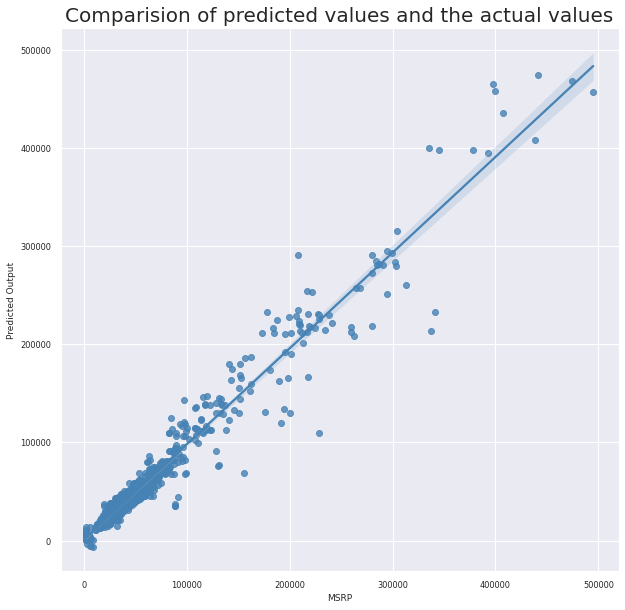

In [ ]:
plt.figure(figsize = (10, 10))
sns.regplot(data = results, y = 'Predicted Output', x = 'MSRP', color = 'steelblue', marker = 'o')
plt.title("Comparision of predicted values and the actual values", fontsize = 20)
plt.show()

In [ ]:
error_mean_square.append(int(mean_squared_error(y_predict, y_test)))
error_mean_absolute.append(int(mean_absolute_error(y_predict, y_test)))

In [ ]:
y_predict = pd.DataFrame(y_predict, columns = ['Predicted Output'])
y_test.to_frame().head()
results = pd.concat([y_predict, y_test.to_frame().reset_index(drop = True)], axis = 1, ignore_index = False)
results.head()

,Predicted Output,MSRP
0,35063.009255,42045
1,24904.635349,24230
2,36803.638043,41135
3,46832.453862,50750
4,3082.789040,2286


In [ ]:
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
import numpy as np
def run_experiment(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("R^2 : ", r2_score(y_test, y_pred))
    print("MAE :", mean_absolute_error(y_test,y_pred))
    print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
run_experiment(model)

R^2 :  0.8974784623933031
MAE : 6074.903498597922
RMSE: 15423.974292653738


In [ ]:
data = {'Models': ['Linear Regression', 'Support Vector Regressor', 'K Nearest Regressor', 'PLS Regression', 'Decision Tree Regressor', 'Gradient Boosting Regressor', 'MLP Regressor'], 
        'Mean Absolute Error': error_mean_absolute,
        'Mean Squared Error': error_mean_square
        }
model_dataframe = pd.DataFrame(data)

In [ ]:
model_dataframe

,Models,Mean Absolute Error,Mean Squared Error
0,Linear Regression,5894,219762716
1,Support Vector Regressor,22686,2410688934
2,K Nearest Regressor,3966,73887911
3,PLS Regression,5888,219996890
4,Decision Tree Regressor,3481,72656180
5,Gradient Boosting Regressor,3353,53968761
6,MLP Regressor,4428,88876449


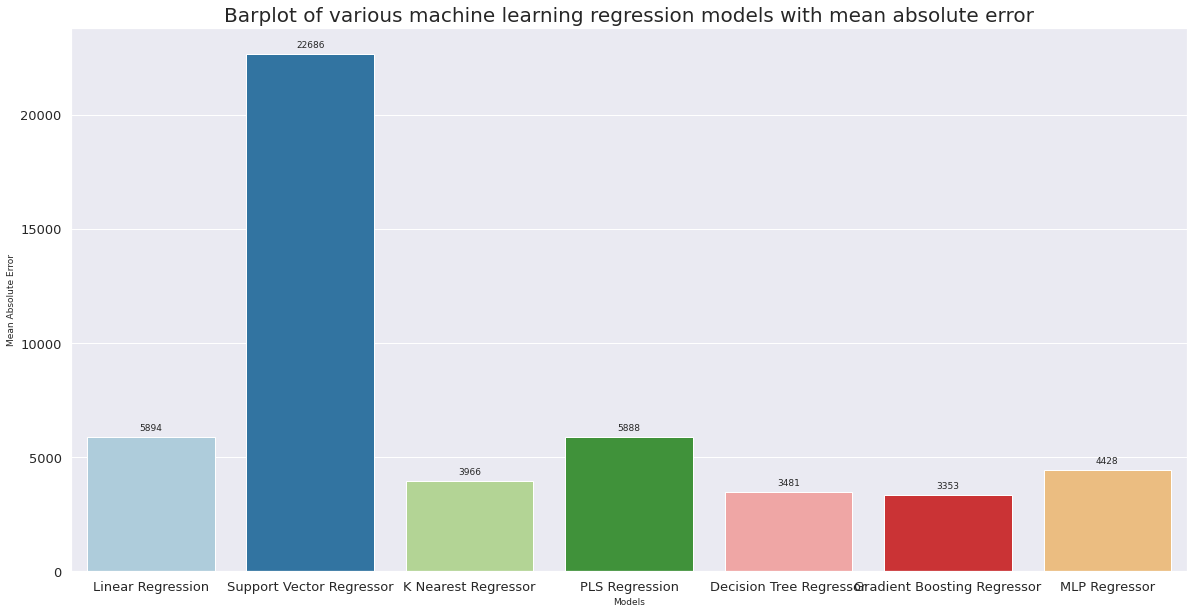

In [ ]:
plt.figure(figsize = (20, 10))
splot = sns.barplot(data = model_dataframe, x = 'Models', y = 'Mean Absolute Error', palette = 'Paired')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.title("Barplot of various machine learning regression models with mean absolute error", fontsize = 20)
plt.show()

## Model summary
- error grape show **Gradient Boosting Regressor** preform very well complete with other model with R^2 score = 0.96
- SVR, the SVM base regressor was poor model wit highest error and minus R^2. 
it definately see at the grape plot between prediciton and MSRP

# Car Prices Prediction SUMMARY!!!
- I learning a lot from start with data loading
- I luckly the data not durty much so I quite skipp the data cleansing and preparing. 
- The fastastic of EDA, many step and technique relate to statistic base to wellknown about your data before make a prediction. it very important process.
- in the EDA step, Tranform target is still stick in mind the question is " Should we transform the target and if yes, is it have be transform back??
I have to find the answer.
- Modeling, it prove the buzz that Gradient Boosting is powerful for ML, I totally agree and I need to know more about it. basically Gradient Boosting is a good way to optomize loss. anyway I have to learn more.
- K Nearest Regressor was not so bad I though I can't look over them.


--------------------------------------------------------------------------------
Finally, hope you not get boring and hope you enjoy! see you. :)